In [175]:
import numpy as np
# import scipy as sp
from scipy import interpolate
from scipy.stats import lognorm, norm, powerlaw
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.mlab as mlab
from matplotlib import style
# style.use('seaborn-whitegrid')w
from IPython.display import clear_output
import glob
import random
import copy
import os
import zipfile
import itertools as it
import time as time_module
from amuse.units import units
import matplotlib.animation as manimation
import gc
import time
from tqdm import tqdm
import multiprocessing as mp
from functools import partial
import itertools

In [ ]:
import  matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
# print(names)

In [42]:
font = matplotlib.font_manager.FontProperties(family='TimesBold')
file = matplotlib.font_manager.findfont(font)
font

In [43]:
matplotlib.matplotlib_fname()

'/home/gautam/miniconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'

In [93]:
# matplotlib.font_manager.findSystemFonts(fontext='ttf')

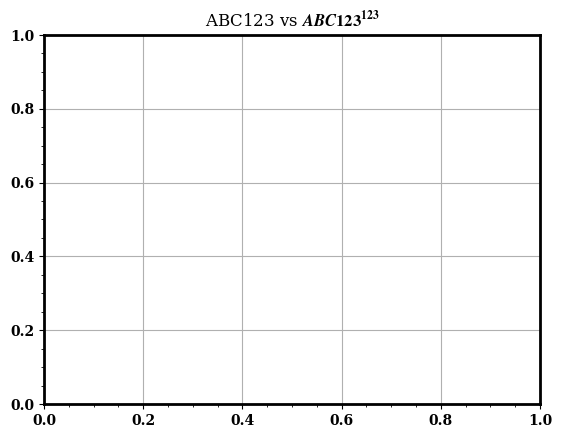

In [187]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# plt.rcParams["font.family"] = "Serif"
# # plt.rcParams["font.serif"] = "TIMES"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times"] + plt.rcParams["font.serif"]
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['mathtext.rm'] = 'Serif'
matplotlib.rcParams['mathtext.it'] = 'Serif'
matplotlib.rcParams['mathtext.bf'] = 'Serif'
matplotlib.rcParams['text.usetex']= False
plt.rc('axes', linewidth=2)
plt.rc('font', weight='bold')
plt.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']
matplotlib.pyplot.title(r'ABC123 vs $ABC123^{123}$')
plt.minorticks_on()
plt.grid()

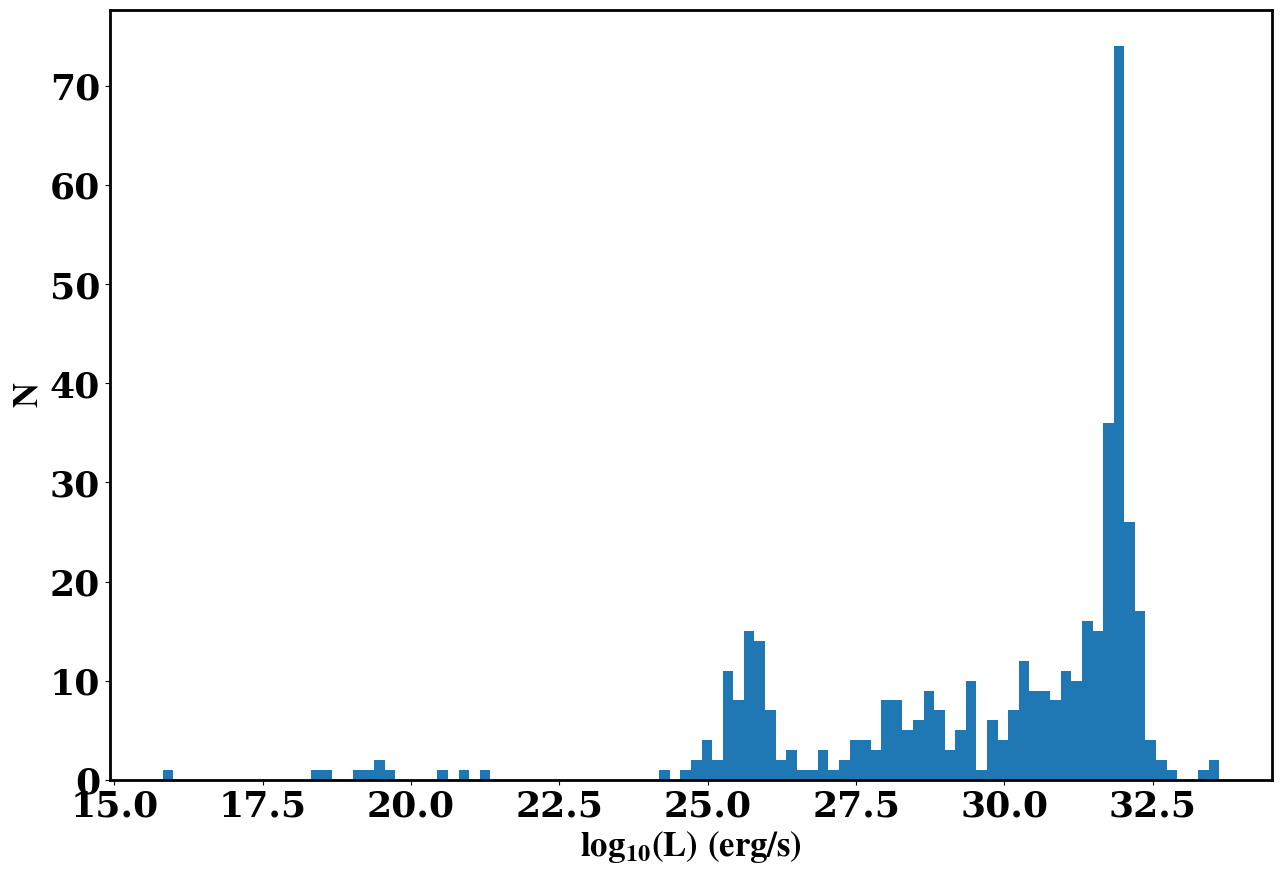

In [117]:
plt.figure(figsize=(15,10))
plt.hist(np.log10(L_mic1[138]),100)

plt.xlabel(r"$\bf{\log_{10}(L)\ (erg/s)}$", fontsize = 25)
plt.ylabel(r"$\bf{N}$", fontsize =25)

# plt.legend(fontsize=19)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

In [4]:
np.seterr(divide = 'ignore') ;
np.seterr(invalid = 'ignore') ;

In [5]:
gc.collect()

44

## If output files are on the local machine

In [ ]:
outdir = "plots"
indir = "OutputFiles_scratch"


z = zipfile.ZipFile( indir)

# print(z.namelist()[:10])
files = np.load(indir)

EvoHist = []
for filename in z.namelist():
    if not os.path.isdir(filename):
        # read the file
#         print(filename)
        if filename[0:len("OutputFiles_test_v1/EvoHist")] == ("OutputFiles_test_v1/EvoHist"):
            EvoHist.append( filename )
            ehists.append( [])
            break
# print(EvoHist)




# zipped = True
# ehists = read_evo_history(EvoHist, zipped, z)
# # Cleanup (if there's no further use of it after this)
# del z                                 

In [ ]:
manager = mp.Manager()
ehists = manager.list([])
k = 0
filenames = glob.glob('OutputFiles_scratch/EvoHist*')

def read(i, k):
    ehists.append(np.load(filenames[i], allow_pickle = True)['arr_0'])
    for j in range(len(ehists[k])):
        if type(ehists[k][j,2]) == np.ndarray:
            ehists[k][j,2] = ehists[k][j,2][0]
    k += 1

ncores = None
with tqdm(total=len(filenames)) as pbar:
    pool = mp.Pool(ncores, maxtasksperchild=int(1e5))
    for aic in enumerate(pool.imap_unordered(partial(read, k=k), 
                                    range(len(filenames)))):
        pbar.update()
    pool.close()
    pool.join()

## If output files are on a REMOTE machine

In [ ]:
import paramiko 

outdir = "plots"
indir = "/home/aashimas/anuj/OutputFiles_scratch"

host = "mash"
port = 22
username = "aashimas"
password = "aashi@1970"
ssh_client = paramiko.SSHClient() 

ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
ssh_client.connect(host, port, username, password)

sftp_client = ssh_client.open_sftp()

In [ ]:
# np.savez_compressed("/home/aashimas/anuj/ehists_allsys", ehists_allsys)
# sftp_client.close()
# ssh_client.close()

In [ ]:
ehists_allsys = np.load("/home/aashimas/anuj/ehists_allsys.npz", allow_pickle=True)
ehists_allsys = ehists_allsys.f.arr_0
sftp_client.close()
ssh_client.close()

In [ ]:
z = zipfile.ZipFile( indir+'.zip' )
EvoHist = []
for filename in z.namelist():
    if not os.path.isdir(filename):
        # read the file
        if filename[0:len("OutputFiles_allsys/EvoHist")] == ("OutputFiles_allsys/EvoHist"):
            EvoHist.append( filename )
# EvoHist

In [ ]:
def read_evo_history(EvoHist):
    ehists = []
    for i in range( len(EvoHist) ):
        try:  
            ehists.append( pd.read_csv(z.open(EvoHist[i]), delimiter = "\t", 
                    compression='gzip', header=None, na_values='nan ').to_numpy() )
        except pd.errors.EmptyDataError:
            pass
    return ehists

zipped = True
ehists = read_evo_history(EvoHist)
# Cleanup (if there's no further use of it after this)
# z.close()
del z 
sftp_client.close()
ssh_client.close()

In [ ]:
len(ehists_allsys)

In [ ]:
ehists_mod = np.append(ehists_scratch, ehists_allsys)

In [ ]:
# np.savez_compressed("ehists_mod", ehists_mod)

## Read from .npz file

In [3]:
# ehists_scratch = np.load("ehists_scratch_1e10.npz", allow_pickle=True)
ehists_scratch = np.load("ehists_bulge_1e6.npz", allow_pickle=True)
# ehists_scratch = np.load("ehists_disk_1e6.npz", allow_pickle=True)
ehists_scratch = ehists_scratch.f.arr_0

# ehists = np.load("ehists_rec.npz", allow_pickle=True)
# ehists = ehists.f.arr_0

In [ ]:
# ehists_g = np.load("ehists_bulge_gonthierB_1e6.npz", allow_pickle=True)
# ehists_g = ehists_g.f.arr_0

ehists_disk = np.load("ehists_disk_1e6.npz", allow_pickle=True)
ehists_disk = ehists_disk.f.arr_0

In [6]:
ehists_mod = np.load("ehists_mod.npz", allow_pickle=True)
ehists_mod = ehists_mod.f.arr_0

In [ ]:
len(ehists_scratch)

In [ ]:
ehists_ssp = []
for i in range(len(ehists_mod)):
    ehists_ssp.append(ehists_mod[i])
    ehists_ssp[i][:,0] = ehists_ssp[i][:,1]

In [ ]:
len(ehists_ssp)

In [ ]:
ehists_scratch[0][:,0]

In [ ]:
M_sim = 0
for ehist in ehists_scratch:
    M_sim += ehist[0,3] + ehist[0,7]

In [ ]:
M_sim

#### Modify data

In [ ]:
ehists_ssp = list(copy.deepcopy(ehists_mod))
for i in aic_indices:
    ehists_ssp.append(ehists_scratch[i])

In [ ]:
len(ehists_mod2)

In [ ]:
# np.savez_compressed("ehists_mod", ehists_mod)

### Save NB variables?

In [ ]:
# dill.dump_session(foldername+'_env.db')
# dill.load_session(foldername+'_env.db')

In [ ]:
# np.savez_compressed("ehists_bulge_1e6", ehists)

In [ ]:
# np.savez_compressed("ehists_scratch_1e10", ehists_mod)

In [ ]:
ehists_scratch = ehists

## MWB SFR

In [ ]:
## Bulge
def f_bulge(z):
    A = -2.62e-2
    B = 0.384
    C = -8.42e-2
    D = 3.254
    return A*z**2 + B*z + C, D


## disk
def f_disk(z):
    A = -4.06e-2
    B = 0.331
    C = 0.338
    D = 0.771
    return A*z**2 + B*z + C, D



# def z(t):
#     t0 = t_end
#     k = t0**(2.0/3)     # today at z = 0, t = t0
#     if t == 0:
#         z = 1e10
#     else:
#         z = k*(t)**(-2.0/3) - 1
#     return z

def z(t):
    t0 = t_end
#     k = (2/69.4)*1e9*3.154e7
    z = np.sqrt((28e9 - t)/t) -1
    return z


def sfh(b_d):
    ## SFR
    t = np.arange(0, t_end, dt)
    sfh = []
    for time in t: 
        if b_d == "Bulge":
            ft, D = f_bulge(z(time))
        elif b_d == "Disk":
            ft, D = f_disk(z(time))
        rate = 10**(max(ft, 0)) - D
        if rate >= 0:
            sfh.append(rate)
        else:
            sfh.append(0)
    return np.array(sfh)


def Nformed_at_t(dt, M_bulge, M_sim, SFR):
    rate = SFR*(M_sim/M_bulge)
    sfr = (rate/sum(rate)) * length
    print(sum(sfr), length)
    t = np.arange(0, t_end, dt)
#     plt.semilogy(t/1e9, (rate/sum(rate)))
#     plt.semilogy(t/1e9, sfr)
    tr = []
    l = 0
    for i in range(len(t)):
        if sfr[i]==0 or sfr[i]==np.nan:
            pass
        else:
            for j in range( int(round(sfr[i])) ):
                tr.append( t[i] )
                l += 1
#     if l>length:
#         tr = tr[0:length]
#     else:
#         t_maxsfr = t[np.argmax(sfr)]
#         tr += [t_maxsfr]*int(length-l)
    return tr


In [ ]:
t_end = 16e9
dt = 1e6
t = np.arange(0, t_end, dt)
# length = len(ehists)
length = 0.095*1e9
M_d = 3.7e10
sfr_d = sfh("Disk")
# sfr_d[:274] = 0
tr_d = Nformed_at_t(dt, M_d, 2e9, sfr_d)

In [ ]:
tr_d = np.load("tr_d.npz", allow_pickle=True)
tr_d = tr_d.f.arr_0

In [ ]:
t_end = 16e9
dt = 1e6
t = np.arange(0, t_end, dt)
# length = len(ehists)
length = 0.095*1e9
M_b = 1.55e10
sfr_b = sfh("Bulge")
tr_b = Nformed_at_t(dt, M_b, 1e9, sfr_b)

In [ ]:
tr_b = np.load("tr_b_M1e10.npz", allow_pickle=True)
tr_b = tr_b.f.arr_0

In [ ]:
# np.savez_compressed("tr_d", tr_d)

In [ ]:
len(tr_b)

In [ ]:
gc.collect()

In [ ]:
plt.figure(figsize=(10, 8))
plt.semilogy(t/1e9, sfr_d, label="Galactic disk")
plt.semilogy(t/1e9, sfr_b, label="Galactic bulge")
plt.ylabel(r'SFR $\rm (M_\odot/yr)$', fontsize=16)
plt.xlabel('Time since formation (Gyr)', fontsize=16)
# plt.title('Galactic bulge star-formation history', fontsize=16)
plt.title('Star-formation history', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(17, 11))
# n, edges = np.histogram(tr_d,100)
# plt.semilogy(edges[:-1]/1e9, n, label="Disk")
n, edges = np.histogram(tr_b,100)
plt.semilogy(edges[:-1]/1e9, n)
plt.ylabel(r'$\frac{\rm{d}N(t)}{\rm{d}t}$', fontsize=26)
plt.xlabel('Time since formation (Gyr)', fontsize=22)
plt.title('Binary birth rate', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
# plt.legend(fontsize=18)
plt.show()

### Modifying ehists

In [ ]:
def modify_ehists(i):
    ehists[i][0,0] = random.choice(tr_b)/1e6
#     ehists[i][0,0] = 0
    B_ = random.choice(B_sam)
    for j in range(1, len(ehists[i])):
        ehists[i][j,0] = ehists[i][j-1,0] + (ehists[i][j,1]-ehists[i][j-1,1])
        if ehists[i][j,5] == 13:
            ehists[i][j,14] = B_

In [ ]:
mu = 8.21
sigma = 0.21
s = np.random.normal(mu, sigma, int(1e6))
B_sim_chris = 10**s
x = np.linspace(min(B_sim_chris), max(B_sim_chris), int(4e3))
p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
B_sam = []
for i in range(len(x)):
    B_sam += [x[i]]*int(len(x)*p[i])

In [ ]:
from tqdm import tqdm
import multiprocessing as mp
# from threading import Semaphore
ncores = None
# manager = mp.Manager()

ehists = ehists_mod

ehists = copy.deepcopy(ehists_mod)
if ncores == 1:
    for i in range(len(ehists)):
        parallel_evolution(i)
else:
    with tqdm(total=len(ehists)) as pbar:
        for i in range(len(ehists)):
            modify_ehists(i)
            pbar.update()

ehists_mod = copy.deepcopy(ehists)

In [ ]:
ehists_mod = np.array(ehists_mod)[aic_indices_mod]

In [ ]:
# np.savez_compressed("ehists_mod", ehists_mod)

In [ ]:
##Disk
ehists_disk = modify_ehists(copy.deepcopy(ehists), tr_d)

In [ ]:
##Bulge
ehists_bulge = modify_ehists(copy.deepcopy(ehists_mod), tr_b)

In [ ]:
len(ehists_mod)

In [ ]:
l = np.array([1,2,3,4,5,6])
l[[0,2]]

In [ ]:
# ehists_mod_orig = copy.deepcopy(ehists_mod)

In [ ]:
for i in range(5):
    ehists_mod = np.append(ehists_mod, ehists_mod)

In [ ]:
len(ehists_mod_orig)

### Indices of AIC systems

In [7]:
aic_indices = []
t_aic_all = []
# ehists = ehists_disk
# ehists = ehists_scratch
ehists = ehists_mod
# ehists = ehists_ssp

with tqdm(total=len(ehists)) as pbar:
    for i in range( len(ehists) ):
#         onewd = False
        aic = False
        try:
            k_onewd = list(ehists[i][:,5]).index(12)
#             onewd = True
            k_ns = list(ehists[i][:,5]).index(13)
            aic_indices.append(i)
            t_aic_all.append(ehists[i][k_ns,0])
            aic = True
        except ValueError:
            aic = False
        pbar.update()    
            
# del ehists
# aic_indices_bulge = aic_indices
# aic_indices_disk = aic_indices
aic_indices_mod = aic_indices
# aic_indices_ssp = aic_indices

100%|██████████| 9194/9194 [00:02<00:00, 3768.60it/s]


In [ ]:
# np.savez_compressed("ehists_s1e6_indices", aic_indices)

AIC events

In [ ]:
dt = 1e7
t_end = 17e9
t = np.arange(0, t_end, dt)
aic_events = np.zeros( int(t_end/dt) )
other_channel = np.zeros( int(t_end/dt) )
k_donor = []
t_aic = []
ehists = ehists_mod
for i in aic_indices_mod:
    aic = False
    onewd = False
    for j in range( np.shape(ehists[i])[0] ):
        if int(ehists[i][j,0]*1e6/dt) != int(ehists[i][j-1,0]*1e6/dt) and ehists[i][j,2]> (ehists[i][j,4]+ehists[i][j,8]):
            if ehists[i][j,5] == 12:
                onewd = True
            if ehists[i][j,5] == 13 and onewd == True:
                aic = True
                aic_events[ int(ehists[i][j,0]*1e6/dt) ] += 1
                if ehists[i][j,9] == 0:
                    k_donor.append(0)
                elif ehists[i][j,9] == 1:
                    k_donor.append(1)
#                 elif ehists[i][j,9] == 2:
#                     k_donor.append(2)
                elif ehists[i][j,9] == 3:
                    k_donor.append(2)
                elif ehists[i][j,9] == 4:
                    k_donor.append(3)
                elif ehists[i][j,9] == 7:
                    k_donor.append(4)
                elif ehists[i][j,9] == 8:
                    k_donor.append(5)
                elif ehists[i][j,9] == 10:
                    k_donor.append(6)
                elif ehists[i][j,9] == 11:
                    k_donor.append(7)
                else:
                    k_donor.append(8)
#                 k_donor.append(ehists[i][j,9])
                t_aic.append(ehists[i][j,0])
                break
            elif ehists[i][j,5] == 13 and onewd == False:
                other_channel[ int(ehists[i][j,0]*1e6/dt) ] += 1
                aic = False
                break

In [ ]:
set(k_donor)

In [ ]:
labels = ["MS", "MS", "RG", "CHeB", "HeMS", "HeHG", "He WD", "CO WD"] 
fig = plt.figure(figsize=(13, 10))
ax = fig.add_subplot(1,1,1)
# fig.canvas.draw()
ax.scatter(np.array(t_aic)/1e3, k_donor, marker="|", c="mediumpurple", s=1000, linewidth=0.7)
# plt.yticks(range(0, 8))
ax.grid(False)
ax.set_yticklabels(labels)
plt.xlabel(r"$\bf{Cosmological\ time \ (Gyrs)}$", fontsize=20)
plt.ylabel(r"$\bf{Donor\ stellar\ type\ (k)}$", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(0, 14)
plt.ylim(-0.4, 7.4)
# plt.savefig("AIC_donor_k.pdf")
plt.show()

In [ ]:
k_donor.count(7)

In [ ]:
G = 1.3218607e+26/(695700)**3               # km**3 * MSun**(-1) * yr**(-2)

time = 14000
redbacks = 0 
blackwidows = 0
ehists = ehists_scratch
for i in aic_indices:
    T = 2*np.pi * np.sqrt(ehists[i][-1,2]**3/(G*(ehists[i][-1,3]+ehists[i][-1,7])))
    if T*365<1:
        if ehists[i][-1,7]>=0.1:
            redbacks += 1
        if 0.1>ehists[i][-1,7]>=0.01:
            blackwidows += 1

In [ ]:
len(aic_indices), redbacks, blackwidows

## Luminosity distribution, Power, $P-\dot{P}$ and $P-B$ w.r.t. time

In [8]:
M_bulge = 1.55e10
M_bulge_low = 1.4e10
M_bulge_high = 1.7e10
# M_sim = 7.3e8
M_sim = 2e9
k_bulge = M_bulge/M_sim

In [9]:
M_disk = 3.7e10
M_disk_low = 3.55e10
M_disk_high = 3.85e10
# M_sim = 1.63e8
M_sim = 2e9
k_disk = M_disk/M_sim

In [10]:
def magnetic_braking(P, dt, B, mass, m_dot, radius, a, AIC, alp, P_wd = 0, m_old = 1.44, r_old = 0.0145):
    flag = None
    P_old = P
    mmass = mass
    rradius = radius
    ww =  ( 2 * np.pi / P ) * 3.154e+7   ##yr^-1
    ddt = dt
    delKE_acc, delKE_prop, delKE_mdb = 0, 0, 0
    EdotGW = 0
    P_dot_final = 0
    P_dot_acc, P_dot_prop, P_dot_mdb, P_dot_GW = 0,0,0,0
    if AIC==True:
        w_s = 0
        G = 1.3218607e+26               # km**3 * MSun**(-1) * yr**(-2)
        RSun = 695700   ## km
        radius = rradius * RSun * 1e5     ## cm
        c = 2.998e10 ## cm/
        

        T = 1e11
        t_g = 47 * (mass/1.4)**-1 * (radius/10)**-4 * (P/1e-3)**6 / 3.154e+7    #syr
        tb = 2.7e11 * (mass/1.4) * (radius/10)**-1 * (P/1e-3)**2 * (T/1e9)**-6 / 3.154e+7     #yr
        ts = 6.7e7 * (mass/1.4)**(-5/4) * (radius/10)**(23/4) * (P/1e-3)**2 * (T/1e9)**2 / 3.154e+7     #yr
        tau = 1 / abs(tb**-1 + ts**-1 - abs(t_g)**-1)
        Jc = 3 * 1.635e-2 * alp**2 * mass*radius**2 / 2
        Jc_dot = - 2* Jc/tau
    
                      
        dt = tau   #yr
                      
        I = (0.4)*(mass*radius**2)      ##g cm^2
        Idot = (I - (0.4)*(m_old * (r_old*RSun*1e5)**2)) / dt    
        w_wd = ( 2 * np.pi / P_wd ) * 3.154e+7   ##yr^-1
        w = ( 2 * np.pi / P ) * 3.154e+7   ##yr^-1
        wdot = (w - w_wd) / dt
        wdot_tot = wdot
        w += wdot*dt/3.154e+7 
#         print(wdot)
#         m_coll_dot = abs(mass - m_old) / dt

        wdot = 3 * 1.635e-2 * alp**2 * w / (0.261*t_g)
        w += wdot*t_g/3.154e+7 
        Jdot = Idot*w + I*wdot + Jc_dot
        wdot = (Jdot/I) - (m_dot*w/mass) - (3*1.635e-2*alp**2*w/(I*tau))
        if 0.01<alp<1:
            wdot = (Jdot/I) * (1 - (3 * 1.635e-2 * alp**2 / (2*0.261)))**-1 - (m_dot*w/mass)
        wdot_tot += wdot
#         print(wdot)
        w += wdot*dt/3.154e+7 
        P = ( 2 * np.pi / w ) * 3.154e+7
        
        alp_dot = -alp*(1/tau + wdot_tot/(2*w) + m_dot/(2*mass))
        alp += alp_dot
        P_dot_GW = (P - P_old)/(ddt*3.154e+7)
        P_dot_final = P_dot_GW
#         print(P_old, P)
    else:       
        mdot_lim = 0 
        if m_dot > mdot_lim: ## MB Accretion-Torque Model-2019, Gittins and Andersson et. al. ::: Accretng Millisecond X-ray Pulsars (AMXPs
            g = 6.67408e-11 |(units.m**3 * units.kg**(-1) * units.s**(-2))
            gauss = units.cm**(-1.0/2) * units.g**(1.0/2) * units.s**(-1)
            b = B |gauss
            mass = mass |units.MSun
            r = rradius |units.RSun
            m_dot = m_dot |units.MSun/units.yr
            dt = dt |units.yr
            w = ( 2 * np.pi / P ) * 3.154e+7   ##yr^-1
            w_old = w |units.yr**-1

            mu = b*r**3         ## G cm^3

            I = (0.4)*(mass*r**2)
    #         I = I.as_quantity_in(units.g * units.cm**2) 
            # print(I)

            r_A = ( (mu)**4 / (2*g*mass * m_dot**2) )**(1.0/7.0)   
            r_A = r_A.as_quantity_in(units.km)       # km
            r_m = xi*r_A
            r_c = (g*mass/w_old**2)**(1.0/3.0) 

            w = ( 2 * np.pi / P ) * 3.154e+7
            w_K_r_m = np.sqrt(g*mass/r_m**3)        
            w_K_r_m = w_K_r_m.as_quantity_in(1/units.yr)  
            w_s = w / w_K_r_m.value_in(units.yr**(-1)) 
    #         P_old = P
            if r_m.value_in(units.km) < r_c.value_in(units.km):
                w_dot = m_dot*np.sqrt(g*mass*r_m)/I
                w = ww + w_dot.value_in(units.yr**-2)*dt.value_in(units.yr)
                P = ( 2 * np.pi / w ) * 3.154e+7
                P_dot = (P - P_old)/dt.value_in(units.s)
                P_dot_acc = P_dot
                P_dot_final = P_dot_acc
                flag = 1

                m =  mmass * 1.989e+33  ##g
                r =  rradius * 6.957e+10     ##cm
                I_old = (0.4)*(m*r**2)      ##g cm^2
                wn = ( 2 * np.pi / P ) * 3.154e+7
                delKE_acc = 0.5 * (I_old*wn**2 - I_old*ww**2)
#                 print(wn, P)

            if r_m.value_in(units.km) >= r_c.value_in(units.km):
                ww = ( 2 * np.pi / P ) * 3.154e+7
                P_dot = - (1-w_s) * 8.1e-5 * np.sqrt(xi) * (mass.value_in(units.MSun)/1.4)**(3.0/7.0) * (1e45/I.value_in(units.g*units.cm**2)) * (mu.value_in(gauss*units.cm**3)/1e30)**(2.0/7.0) * ( P_old*abs(m_dot.value_in(units.MSun/units.yr)/1e-9)**(3.0/7.0) )**2     ## s/yr
                P_dot = P_dot/3.154e+7   ## s/s
                P_dot_prop = P_dot
                P_dot_final = P_dot_prop
                P = P + P_dot*dt.value_in(units.s)
                Pn = P
                wn = ( 2 * np.pi / Pn )*3.154e+7
    #             w_dot = ( 2 * np.pi / Pn ) * 3.154e+7  -  ( 2 * np.pi / P_old ) * 3.154e+7
                flag = 2

                m =  mmass * 1.989e+33  ##g
                r =  rradius * 6.957e+10     ##cm
                I_old = (0.4)*(m*r**2)      ##g cm^2
                
                
                delKE_prop = 0.5 * (I_old*wn**2 - I_old*ww**2)
    #             print(delKE_prop/(1e7*3.154e+7)**2)

    #         Q22 = (1-w_s) * 4.2e37 * xi**0.25 * (mass.value_in(units.MSun)/1.4)**(3.0/14) * (mu.value_in(gauss*units.cm**3)/1e30)**(1.0/7.0) * (m_dot.value_in(units.MSun/units.yr)/1e-9)**(3.0/7.0) * (P_old**-1 / 500)**(-5.0/2)    ## g cm^2
    #         Pdot_GW = 1.4e-19 * (1e45/I.value_in(units.g*units.cm**2)) * (Q22/1e37)**2 * P**-3  ##s/yr
    #         Pdot_GW = Pdot_GW/3.154e+7   ## s/s
    #         P = P + Pdot_GW*dt.value_in(units.s)
    #         P_dot = P_dot + Pdot_GW
    #         w = ( 2 * np.pi / P ) * 3.154e+7


#         elif m_dot <= mdot_lim:
        ww = ( 2 * np.pi / P ) * 3.154e+7
        m = mmass * 1e33
        radius = radius * 695700 * 1e5     ## cm
        c = 2.998e10 ## cm/s
        I = (0.4)*(m*radius**2)      ##g cm^2
        mu = B*radius**3         ## G cm^3
        w_s = 0


        P_dot = B**2 *np.pi**2 * radius**6 * (1+ np.sin(a)**2) / (P_old*I*c**3)
#         P_dot = (B / 3.1782086e+19)**2 * (1+ np.sin(a)**2) / P_old
        P_dot_mdb = P_dot
#         P_dot = P_dot + Pdot_GW
    #     print(P,P_dot)
        P = P + P_dot * ddt *3.154e+7
        Pn = P
        wn = ( 2 * np.pi / P ) * 3.154e+7
        

        m =  mmass * 1.989e+33  ##g
        r =  rradius * 6.957e+10     ##cm
        I_old = (0.4)*(m*r**2)      ##g cm^2
    #     wn = ww + w_dot* ddt *3.154e+7
        delKE_mdb = 0.5 * (I_old*wn**2 - I_old*ww**2)
    #     print(delKE_mdb/(1e7*3.154e+7)**2)

        flag = 3
        P_dot_final = P_dot_mdb


    #     print(P_dot_acc, P_dot_prop, P_dot_mdb)
    #     print(delKE_acc, delKE_prop, delKE_mdb)

#     P_dot = P_dot_acc+ P_dot_prop+ P_dot_mdb+ P_dot_GW
    if abs(P_dot_mdb) > abs(P_dot_prop):
        flag = 3
    if abs(P_dot_mdb) < abs(P_dot_prop):
        flag = 2
    if abs(P_dot_GW) > abs(P_dot_mdb) and abs(P_dot_GW) > abs(P_dot_prop):
        flag = 1
#     P = P_old + P_dot * ddt *3.154e+7
    w = ( 2 * np.pi / P ) * 3.154e+7
    P_dot = (P - P_old)/(ddt*3.154e+7)
#     print(w, P)
    return P, w, w_s, P_dot, flag, alp, P_dot_mdb, delKE_acc, delKE_prop, delKE_mdb
        

In [161]:
# from tqdm import tqdm
# import multiprocessing as mp
# from functools import partial

def find_nearest(array, value):
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
class Distributions:
    def process(self, i, B, a, eta, eta_g):
        G = 1.3218607e+26               # km**3 * MSun**(-1) * yr**(-2)
        G_ = 1.3218607e+26/(695700)**3               # km**3 * MSun**(-1) * yr**(-2)
        g = 6.67408e-11 |(units.m**3 * units.kg**(-1) * units.s**(-2))
        G = g.value_in(units.RSun**3 * units.MSun**(-1) * units.yr**(-2))
        # c = 9.4605284e12                # km/yr
        RSun = 695700   ## km
        c = 2.998e10 ## cm/s
        cc = 2.998e10 |units.cm / units.s  ## cm/s
        
        delKE_acc = 0
        delKE_prop = 0
        delKE_mdb = 0
        
#         i = aic_indices[j]
        
        t = np.arange(0, t_end, dt)
        time_i = ehists[i][:,0]
        self.birthtimes.append(time_i[0])
        types_i = ehists[i][:,5]
        for k in range(len(types_i)):
            if types_i[k] == 13 and types_i[k-1] == 12:
                aic_ind = k
                self.t_aic.append(time_i[aic_ind])
                break

        begining = True 
        j = 0
#         self.pp = []
#         self.ll = []
#         B = ehists[i][-1,14]
#         B = B_list[i]
#         B = random.choice(B_sim_chris)
#         a = a_list[i]
        
        a_d_old = ehists[i][j,2]
#         self.dat[i].append([B, a])
        mic = False
        for t_i in t:
            j_old = j
            j = find_nearest(time_i, t_i/1e6)
            if ehists[i][j,2] == ehists[i][j-1,2]:
                self.mic[int(t_i/dt)]+=1
                mic = True
            if j==j_old:
                mdot = 0
                mloss = 0
            else:
                mdot = ehists[i][j,6]
                mloss = ehists[i][j,10]
            a_d = ehists[i][j,2]
            M1 = ehists[i][j,3]
            M2 = ehists[i][j,7]
            if a_d == a_d_old:
                cc = 9.4605284e12                # km/yr
                adot_grav = - (64/5) * (G**3 * M1*M2*(M1+M2)) / (cc**5 * (a_d_old*RSun)**3)
                a_d = a_d_old + adot_grav/RSun * dt
            if j ==j_old:
                P_orb = None
            else:
                P_orb = 2*np.pi* np.sqrt(a_d**3/(G*(M1+M2)))*525600     ##minutes
            a_d_old = a_d
#             if types_i[j] == 13 and i in aic_indices:
            if types_i[j] == 13:
                w_breakup = np.sqrt(G*ehists[i][j,3]/(ehists[i][j,4]*RSun)**3)
                P_breakup = ( 2 * np.pi /(w_breakup) ) * 3.154e+7    #second
                if accretion == False:
                    mass = ehists[i][j,3] * 1.98e33
                    radius = ehists[i][j,4] * 695700 * 1e5
                    c = 2.998e10 ## cm/s
                    I = (0.4)*(mass*radius**2)      ##g cm^2
                    if begining == True:
#                         P_old = ehists[i][j,12]
#                         P = ehists[i][j,12]
#                         w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                        l = 1
                        w_wd = ( 2 * np.pi / (ehists[i][j-l,12]) ) * 3.154e+7  
                        w_ns = ( (ehists[i][j-l,3] / ehists[i][j,3]) * ( ehists[i][j-l,4]/ehists[i][j,4] )**2 ) * w_wd
                        P = ( 2 * np.pi / ( w_ns) ) * 3.154e+7  #seconds
                        if P<0.8e-3:
                            P = ehists[i][j,12]
                            w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                            if P<0.8e-3:
                                P = 1e-3
                                w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                        self.Pbirth.append(P)
                        alp = np.random.random()
                        mass =  ehists[i][j,3] * 1.989e+33  ##g
                        r =  ehists[i][j,4] * 6.957e+10     ##cm
                        I = (0.4)*(mass*r**2)      ##g cm^2
#                         self.KE0.append(0.5*I*w_ns**2/3.154e+7**2)
                        KE_ = 0.5*I*w_ns**2
                        
                        self.mass.append(ehists[i][j,3])
            
                        self.Pbirth.append(P)
                        alp = np.random.random()
#                         alp = 1e-6
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb1, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                500e-2/3.154e+7, B, ehists[i][j,3], mdot, ehists[i][j,4], a, True, alp, ehists[i][j-1,12], ehists[i][j-1,3], ehists[i][j-1,4])
                        KE__ = 0.5*I*w**2
                        self.delKE_gw.append((KE__ - KE_)/3.154e+7**2)
                        self.KE0.append(0.5*I*w**2/3.154e+7**2)

                        
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb2, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        delKE_acc += delKE_acci
                        delKE_prop += delKE_propi
                        delKE_mdb += delKE_mdbi
                        
#                         P_dot_mdb = P_dot_mdb1+P_dot_mdb2
                        P_dot_mdb = P_dot_mdb2
                        begining = False
                        P_old = P 
                        P_dot_old = P_dot
                        begining = False
                    else:
                        P = P_old
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                                                    dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        delKE_acc += delKE_acci
                        delKE_prop += delKE_propi
                        delKE_mdb += delKE_mdbi
                        P_old = P 
                        P_dot_old = P_dot
                    if P<40e-3 and P_dot > 0 and P_dot_old > 0:
                        self.n[int(t_i/dt)].append( 2 - (P*(P_dot-P_dot_old)/(dt * 3.154e+7))/P_dot**2 )
                    P_dot_old = P_dot

                if accretion == True:
                    if begining == True:
                        l = 1
                        w_wd = ( 2 * np.pi / (ehists[i][j-l,12]) ) * 3.154e+7  
                        w_ns = ( (ehists[i][j-l,3] / ehists[i][j,3]) * ( ehists[i][j-l,4]/ehists[i][j,4] )**2 ) * w_wd
                        P = ( 2 * np.pi / ( w_ns) ) * 3.154e+7  #seconds
                        if P<0.8e-3:
                            P = ehists[i][j,12]
                            w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                            if P<0.8e-3:
                                P = np.random.random()*100e-3
                                w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                        
#                         P = ehists[i][j,12]
#                         w_ns = ( 2 * np.pi / ( P) ) * 3.154e+7
                        mass =  ehists[i][j,3] * 1.989e+33  ##g
                        r =  ehists[i][j,4] * 6.957e+10     ##cm
                        I = (0.4)*(mass*r**2)      ##g cm^2
#                         self.KE0.append(0.5*I*w_ns**2/3.154e+7**2)
                        KE_ = 0.5*I*w_ns**2
                        
                        self.mass.append(ehists[i][j,3])
            
                        self.Pbirth.append(P)
                        alp = np.random.random()
#                         alp = 1e-6
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb1, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                500e-2/3.154e+7, B, ehists[i][j,3], mdot, ehists[i][j,4], a, True, alp, ehists[i][j-1,12], ehists[i][j-1,3], ehists[i][j-1,4])
                        KE__ = 0.5*I*w**2
                        self.delKE_gw.append((KE__ - KE_)/3.154e+7**2)
#                         delKE_acc += delKE_acci
#                         delKE_prop += delKE_propi
#                         delKE_mdb += delKE_mdbi
#                         if j==k:
                        self.KE0.append(0.5*I*w**2/3.154e+7**2)
#                         if 0.5*I*w**2/3.154e+7**2 > 1e52:
#                             print(P, mass, r)
                        
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb2, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        delKE_acc += delKE_acci
                        delKE_prop += delKE_propi
                        delKE_mdb += delKE_mdbi
                        
#                         P_dot_mdb = P_dot_mdb1+P_dot_mdb2
                        P_dot_mdb = P_dot_mdb2
                        begining = False
                        P_old = P 
                        self.aic.append(self.aic[-1]+1)
                    else: 
                        P = P_old
                        P, w, w_s, P_dot, flag, alp, P_dot_mdb, delKE_acci, delKE_propi, delKE_mdbi = magnetic_braking(P, 
                                                                                                    dt, B, ehists[i][j,3], mdot, ehists[i][j,4], a, False, alp)
                        delKE_acc += delKE_acci
                        delKE_prop += delKE_propi
                        delKE_mdb += delKE_mdbi
                        P_old = P 
#                 self.pp.append(P)
                f, alpha, beta = 0.0122, -2.12, 0.82                                   
                L_gamma = 6.8172e35 * f * (P/1e-3)**alpha * (P_dot_mdb/1e-20)**beta 
#                 self.ll.append(L_gamma)
#                 self.dat[i].append([t_i/1e9, P, P_dot_mdb, ehists[i][j,3],
#                                     ehists[i][j,7], ehists[i][j,9], a_d_old])

                        
                        
                        
                        

                
#                 print(delKE_mdb/(dt*3.154e+7)**2)
#                 if P<40e-3 and P_dot > 0:
                if P_dot > 0:
                    mass =  ehists[i][j,3] * 1.989e+33  ##g
                    r =  ehists[i][j,4] * 6.957e+10     ##cm
                    I = (0.4)*(mass*r**2)      ##g cm^2
                    E_dot_mdb = 4 * np.pi**2 * I * P_dot_mdb/P**3     # g cm^2 / s^3 = ergs/s
                    E_dot = 4 * np.pi**2 * I * P_dot/P**3     # g cm^2 / s^3 = ergs/s
#                     ag, bg, dg = 1.2, 0.1, 0.5
#                     aE, bE = 0.18, 2.83
#                     sigma = 0.23
#                     mu = aE * np.log10(E_dot/10**(34.5)) + bE
#                     s = np.random.normal(mu, sigma, int(1e3))
#                     x = np.linspace(min(10**s), max(10**s), int(1e3))
#                     p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
#                     p = p/len(p)/np.mean(p)
#                     Ecut = np.random.choice(x,p=p)*0.00160218  ##erg
#                     L_gamma=eta_g * Ecut**ag * B**bg * E_dot**dg
                    f, alpha, beta = 0.0122, -2.12, 0.82                                    ##slot-gap two-pole caustic (TPC) Gonthier 2018
                    L_gamma = 6.8172e35 * f * (P/1e-3)**alpha * (P_dot_mdb/1e-20)**beta 
                    self.dNdL_gamma[int(t_i/dt)].append( L_gamma )
                    self.Power[int(t_i/dt)].append( 1/P**2 )
                    self.P_dist[int(t_i/dt)].append( P )
                    self.P_dot_dist[int(t_i/dt)].append( P_dot )
                    self.P_dot_mdb_dist[int(t_i/dt)].append( P_dot_mdb )
                    self.B_dist[int(t_i/dt)].append( B ) 
#                     if L_gamma>1e33:
#                         self.detectable[int(t_i/dt)].append( True )
#                     else:
#                         self.detectable[int(t_i/dt)].append( False )
                    self.Edot[int(t_i/dt)].append(E_dot)
                    self.Edot_mdb[int(t_i/dt)].append(E_dot_mdb)
                    self.k_donor[int(t_i/dt)].append( ehists[i][j,9] )
#                     self.brake_flags[int(t_i/dt)].append( flag )
#                     T = 2*np.pi * np.sqrt(ehists[i][-1,2]**3/(G_*(ehists[i][j,3]+ehists[i][j,7])))
#                     if T*365<1:
#                         if ehists[i][j,7]>=0.1:
#                             self.redbacks[int(t_i/dt)] += 1
#                         if 0.1>ehists[i][j,7]>=0.01:
#                             self.blackwidows[int(t_i/dt)] += 1
                    if mic == True:
                        self.L_mic[int(t_i/dt)].append( L_gamma )
            
                    

            if ehists[i][j,5] in [10,11,12,13] or ehists[i][j,9] in [10,11,12,13]:  ## if primary is an accreting WD or NS
                if mdot>0:   ##primary accreting
#                     eta = 1.0  ##η_bol ≈ 0.55
                    R_sch = 2 * G * (ehists[i][j,3]) / c**2
                    xi_ = 0.5 * R_sch / (ehists[i][j,4])
                    L = eta * xi_ * abs(mdot) * c**2 
                    L = L * 2e33 * (6.957e+10)**2 / (3.154e+7)**3 
#                     eta = 0.55 * 0.01  ##η_bol ≈ 0.55
#                     L = eta * G * ehists[i][j,3] * abs(ehists[i][j,6]) / (ehists[i][j,4])
#                     L = L * 1.989e33 * (6.957e+10)**2 / (3.154e+7)**3 

                elif mloss>0: ##secondary accreting
#                     eta = 1.0   ##η_bol ≈ 0.55
                    R_sch = 2 * G * (ehists[i][j,7]) / c**2
                    xi_ = 0.5 * R_sch / (ehists[i][j,8])
                    L = eta * xi_ * abs(mloss) * c**2 
                    L = L * 2e33 * (6.957e+10)**2 / (3.154e+7)**3 
#                     eta = 0.55 * 0.01  ##η_bol ≈ 0.55
#                     L = eta * G * ehists[i][j,7] * abs(ehists[i][j,10]) / (ehists[i][j,8])
#                     L = L * 1.989e33 * (6.957e+10)**2 / (3.154e+7)**3 
                else:
                    L = 0
                if L > 0:
                    self.dNdL_x[int(t_i/dt)].append( L ) 
                    if ehists[i][j,5] in [10,11,12]:
                        self.dNdL_xwd[int(t_i/dt)].append( L ) 
                    if ehists[i][j,5] == 13:
                        self.dNdL_xns[int(t_i/dt)].append( L )
                    if L >= 1e36:
                        self.Lx_count[int(t_i/dt)] += 1
                    self.Lx_count_all[int(t_i/dt)] += 1
                    self.P_orb[int(t_i/dt)].append( P_orb )
        
        if types_i[j] == 13:            
            self.delKE_acc.append(delKE_acc/3.154e+7**2)
            self.delKE_prop.append(delKE_prop/3.154e+7**2)
            self.delKE_mdb.append(delKE_mdb/3.154e+7**2)
            mass =  ehists[i][j,3] * 1.989e+33  ##g
            r =  ehists[i][j,4] * 6.957e+10     ##cm
            I = (0.4)*(mass*r**2)      ##g cm^2
            self.KE138.append(0.5*I*w**2/3.154e+7**2)
            if ehists[i][j,7] <0.001:
                self.isolated.append(1)
            else:
                self.isolated.append(0)
                    
                    
    def __init__(self, indices):
        t = np.arange(0, t_end, dt)
        self.dNdL_gamma = [[] for _ in range(len(t))]
        self.Edot = [[] for _ in range(len(t))]
        self.Edot_mdb = [[] for _ in range(len(t))]
        self.L_g_noaic = [[] for _ in range(len(t))]
        self.P_dist = [[] for _ in range(len(t))]
        self.P_dot_dist = [[] for _ in range(len(t))]
        self.P_dot_mdb_dist = [[] for _ in range(len(t))]
        self.Power = [[] for _ in range(len(t))]
        self.B_dist = [[] for _ in range(len(t))]
        self.age = [[] for _ in range(len(t))]
        self.dNdL_x = [[] for _ in range(len(t))]
        self.dNdL_xwd = [[] for _ in range(len(t))]
        self.dNdL_xns = [[] for _ in range(len(t))]
        self.birthtimes = []
        self.detectable = [[] for _ in range(len(t))]
        self.Lx_count = [0 for _ in range(len(t))]
        self.Lx_count_all = [0 for _ in range(len(t))]
        self.t_aic = []
        self.n = [[] for _ in range(len(t))]
        self.Pbirth = []
        self.brake_flags = [[] for _ in range(len(t))]
        self.redbacks = [0 for _ in range(len(t))]
        self.blackwidows = [0 for _ in range(len(t))]
        self.KE0 = []
        self.KE138 = []
        self.delKE_acc = []
        self.delKE_prop = []
        self.delKE_mdb = []
        self.delKE_gw = []
        self.mass = []
        self.finalmass = []
        self.isolated = []
        self.pp = []
        self.ll = []
        self.aic = [0]
        self.mic = [0 for _ in range(len(t))]
        self.dat = [[] for _ in range(len(ehists))]
        self.P_orb = [[] for _ in range(len(t))]
        self.k_donor = [[] for _ in range(len(t))]
        self.L_mic = [[] for _ in range(len(t))]
        
        B_list = np.random.choice(B_sam, len(ehists))
        a_list = np.random.choice(a_sam, len(ehists))
        eta = np.random.choice(etalist, len(ehists))
        eta_g = np.random.choice(eta_sam, len(ehists))
        
        

#         with tqdm(total=len(ehists)) as pbar:
#             for j in range(len(ehists)):
        with tqdm(total=len(indices)) as pbar:
            for j in indices:
                self.process(j, B_list[j], a_list[j], eta[j], eta_g[j])
                pbar.update()
        print("Done!")
#             ncores = 2
#             args = [(ehists, aic_indices[i]) for i in range(len(aic_indices))]
#             print(args)
#             with mp.Pool(processes=ncores) as pool:

#                 for i in enumerate(pool.starmap(self.process, 
#                                             args )):    
#                     pbar.update()

                    

def call_distributions(indices):
    return Distributions(indices)

In [12]:
al = np.linspace(0, np.pi/2, int(1e3))
alpdf = 0.5*np.sin(al)

In [13]:
# plt.plot(al,alpdf);

In [14]:
n_ = 1e4
a_sam = []
for i in range(len(al)):
    a_sam += [al[i]]*int(n_*alpdf[i])

In [15]:
# plt.hist(a_sam,100);

In [16]:
etalist = np.arange(0.1, 0.3, 0.001)

In [17]:
## B
mu = 8.21
sigma = 0.21
s = np.random.normal(mu, sigma, int(1e6))
B_sim_chris = 10**s
x = np.linspace(min(B_sim_chris), max(B_sim_chris), int(4e3))
p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
B_sam = []
for i in range(len(x)):
    B_sam += [x[i]]*int(len(x)*p[i])

In [18]:
# plt.hist(np.log10(B_sim_chris), 50, alpha = 0.5);
# plt.plot(np.log10(x), np.log10(n_*p));
# plt.hist(np.log10(B_sam), 50, alpha = 0.8);

In [19]:
## eta_L
mu = 12    ##log10x_med = mu
sigma = 0.52
s = np.random.normal(mu, sigma, int(1e6))
x = np.linspace(min(10**s), max(10**s), int(4e3))
p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
eta_sam = []
for i in range(len(x)):
    eta_sam += [x[i]]*int(len(x)*p[i])

In [40]:
L_dist = [[] for _ in range(140)]
ag, bg, dg = 1.2, 0.1, 0.5
eta = np.random.choice(eta_sam)
with tqdm(total=140) as pbar:
    for i in range(140):
        if len(Edot_mdb1[i])>0:
            for j in range(len(Edot_mdb1[i])):
                aE, bE = 0.18, 2.83
                mu = aE * np.log10(Edot_mdb1[i][j]/10**(34.5)) + bE
                sigma = 0.23
                s = np.random.normal(mu, sigma, int(1e2))
                x = np.linspace(min(10**s), max(10**s), int(20))
                p = (np.sqrt(2*np.pi)*sigma)**-1 * np.exp( -(np.log10(x)-np.log10(10**mu))**2 /(2*sigma**2)  )
                p = p/len(p)/np.mean(p)
#                 Ecut_sam = []
#                 for k in range(len(x)):
#                     Ecut_sam += [x[k]]*int(len(x)*p[k])
                Ecut = np.random.choice(x,p=p)*1.60218e-6  ##erg
                L_dist[i].append(eta * Ecut**ag * B1[i][j]**bg * Edot_mdb1[i][j]**dg)
        pbar.update()

100%|██████████| 140/140 [04:23<00:00,  1.88s/it]


In [ ]:
# plt.hist(np.log10(B_sim_chris), 50, alpha = 0.5);
# plt.plot(np.log10(x), np.log10(n_*p));
# plt.hist(np.log10(Ecut_sam), 50);

In [ ]:
gc.collect()

In [ ]:
k_bulge, k_disk

In [162]:
dt = 1e8
t_end = 14e9
accretion = True
# accretion = False
# dist_disk = call_distributions(ehists_disk, accretion, dt)
xi = 0.5
ehists = copy.copy(ehists_mod)
dist1 = call_distributions(aic_indices_mod)

100%|██████████| 9194/9194 [03:56<00:00, 38.94it/s]


Done!


In [194]:
# import pickle 
# def save_object(obj, filename):
#     with open(filename, 'wb') as output:  # Overwrites any existing file.
#         pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

# # sample usage
# save_object(dist1, 'dist1.pkl')

# # with open('dist1.pkl', 'rb') as input:
# #     dist1 = pickle.load(input)


In [163]:
dNdL_gamma1 = dist1.dNdL_gamma
L_g_noaic1 = dist1.L_g_noaic
dNdL_x1 = dist1.dNdL_x
dNdL_xwd1 = dist1.dNdL_xwd
dNdL_xns1 = dist1.dNdL_xns
Power1 = dist1.Power
P1 = dist1.P_dist
Pdot1 = dist1.P_dot_dist
Pdot_mdb1 = dist1.P_dot_mdb_dist
B1 = dist1.B_dist
birthtimes1 = dist1.birthtimes
detectable1 = dist1.detectable
t_aic1 = dist1.t_aic
Lx_count1 = dist1.Lx_count
Lx_count_all1 = dist1.Lx_count_all
Edot1 = dist1.Edot
Edot_mdb1 = dist1.Edot_mdb
Pbirth1 = dist1.Pbirth
taic1 = dist1.t_aic
flags1 = dist1.brake_flags
redbacks1 = dist1.redbacks
blackwidows1 = dist1.blackwidows
NS_mass1 = dist1.mass

KE0_1 = dist1.KE0
KE138_1 = dist1.KE138
delKE_acc_1 = dist1.delKE_acc
delKE_prop_1 = dist1.delKE_prop
delKE_mdb_1 = dist1.delKE_mdb
delKE_gw_1 = dist1.delKE_gw

isolated1 = dist1.isolated
pp1 = dist1.pp
ll1 = dist1.ll
dat1 = dist1.dat

P_orb1 = dist1.P_orb
mic1 = dist1.mic
L_mic1 = dist1.L_mic

In [161]:
min(P_orb1[138])

47.79604816325277

In [51]:
Lx_count_all1[138]

6998

In [174]:
len(dNdL_xwd1[138]), len(dNdL_xns1[138]), len(dNdL_x1[138]), len(dNdL_gamma1[138])

(28, 6970, 6998, 9063)

In [186]:
sum(np.array(P_orb1[138])<60)

43

In [187]:
mic1[138]

409

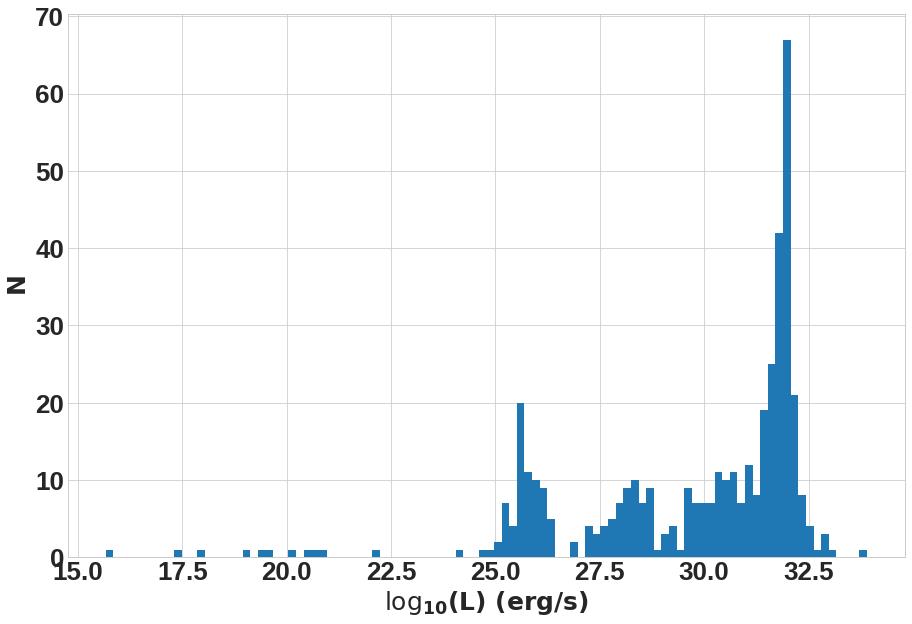

In [255]:
plt.figure(figsize=(15,10))
plt.hist(np.log10(L_mic1[138]),100)
plt.xlabel(r"$ \bf{\log_{10}(L)\ (erg/s)}$", fontsize = 25)
plt.ylabel(r"$ \bf{N}$", fontsize =25)
# plt.legend(fontsize=19)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

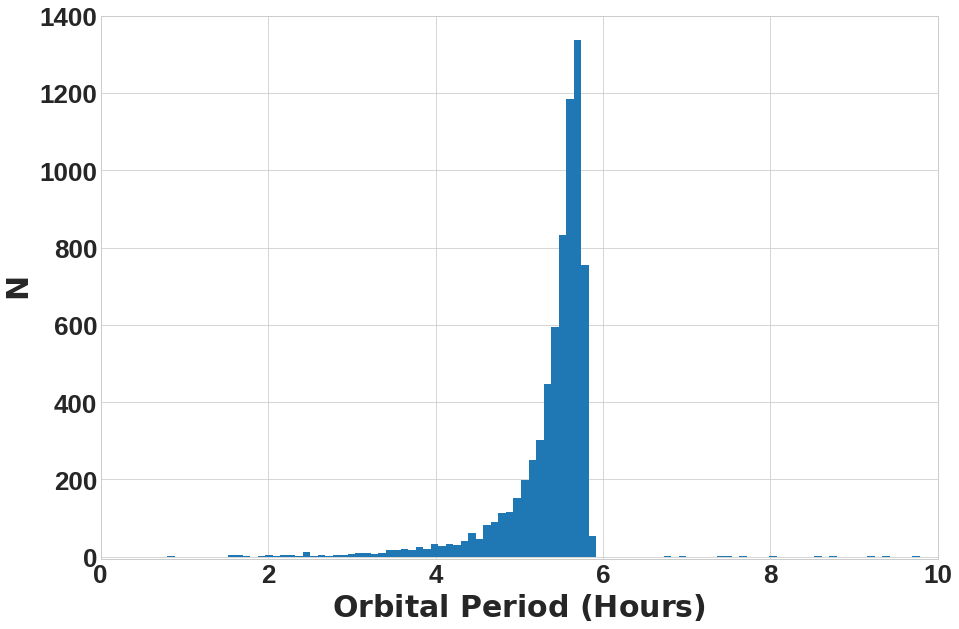

In [250]:
plt.figure(figsize=(15,10))
plt.hist([i/60 for i in P_orb1[138] if i<1e3], 100)
plt.xlim(0, 10)
plt.ylim(-7, 1400)
plt.xlabel(r"$ \bf{Orbital\ Period\ (Hours)}$", fontsize = 30)
plt.ylabel(r"$ \bf{N}$", fontsize = 30)
# plt.legend(fontsize=19)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# plt.savefig("orbital_period_dist.pdf")
plt.show()

In [57]:
max(dNdL_xw1[138])

2.0925852036248743e+35

In [ ]:
data = []
for i in aic_indices_bulge:
    data.append(dat1[i])

In [ ]:
np.savez_compressed("P_Pdot_M_evo", data)

In [ ]:
import csv
with open("evolution_data_BulgeSFR"+'.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(len(data)):
        writer.writerows(data[i])

In [231]:
sum(dNdL_gamma1[138])*k_bulge

4.0277179280258846e+36

In [ ]:
i = 10
KE138_1[i], KE0_1[i] + (delKE_acc_1[i] + delKE_prop_1[i] + delKE_mdb_1[i]), (KE0_1[i], delKE_acc_1[i], delKE_prop_1[i], delKE_mdb_1[i])

In [ ]:
KE0_1[0], delKE_mdb_1[0], delKE_gw_1[0]

In [ ]:
sum(isolated1),len(isolated1)

In [ ]:
0.5*1e45 * ( ( 2 * np.pi / (0.002) ) )**2

In [ ]:
# plt.figure(figsize=(14,8))
# plt.hist(NS_mass1, 100)
# plt.show()

In [ ]:
k = np.abs(np.array(KE0_1) + np.array(delKE_acc_1) + np.array(delKE_prop_1) + np.array(delKE_mdb_1))

In [ ]:
plt.figure(figsize=(14,8))
plt.hist(np.log10(KE138_1), 100, label="KE at t = 13.8 Gyrs", alpha = 0.5)
plt.hist(np.log10(KE0_1), 400, label="KE at AIC", alpha = 0.5)
# plt.hist(np.log10(np.array(k), where=np.array(k)>0), 100, alpha = 0.5, label = "KE at AIC + changes in KE till t=13.8 Gyrs")
plt.ylabel(r"N",fontsize = 20)
plt.xlabel("$\log_{10} (KE)$ (erg)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 15)
plt.xlim(47, 54)
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
d1, d2, d3, d4 = np.abs(delKE_prop_2), np.abs(delKE_mdb_2), np.abs(delKE_acc_2), np.abs(delKE_gw_2)
stack = np.hstack((np.hstack((np.hstack((d1,d2)),d3)),d4))
bins=np.histogram(np.log10(stack, where = np.abs(stack)>0), bins=40)[1]
                  
plt.hist(np.log10(np.abs(d1), where = np.abs(d1)>0), bins, linewidth=5,
         alpha = 0.8, label=r"$\bf{-\Delta KE_{propeller}}$")
plt.hist(np.log10(np.abs(d2), where = np.abs(d2)>0), bins, linewidth=5, 
         alpha = 0.8, label=r"$\bf{-\Delta KE_{ejector}}$")
plt.hist(np.log10(np.abs(d3), where = np.abs(d3)>0), bins, linewidth=5, 
         alpha = 0.8, label=r"$\bf{\Delta KE_{accretor}}$")
plt.hist(np.log10(np.abs(d4), where = np.abs(d4)>0), bins, linewidth=5, 
         alpha = 0.8, label=r"$\bf{-\Delta KE_{GW}}$")


# v1 = np.histogram(np.log10(np.abs(d1), where = np.abs(d1)>0), bins)[0]
# v2 = np.histogram(np.log10(np.abs(d2), where = np.abs(d2)>0), bins)[0]
# v3 = np.histogram(np.log10(np.abs(d3), where = np.abs(d3)>0), bins)[0]
# v4 = np.histogram(np.log10(np.abs(d4), where = np.abs(d4)>0), bins)[0]

# data = np.vstack((np.vstack((np.vstack((v1,v2)),v3)),v4))
# color_list = ['b', 'orange', 'g', 'r']
# gap = 1.2 / len(data)
# for i, row in enumerate(data):
#     X = bins[:-1]
#     plt.bar(X + i * gap, row,
#         width = gap,
#         color = color_list[i % len(color_list)])




# plt.hist(np.log10(np.abs(delKE_gw_1), where = np.abs(delKE_gw_1)>0), 200,alpha = 0.5)
# plt.hist(np.log10(np.array(k), where=np.array(k)>0), 100, alpha = 0.5, label = "KE at AIC + changes in KE till t=13.8 Gyrs")
plt.ylabel(r"$\bf{N}$",fontsize = 20)
plt.xlabel(r"$\bf{\log_{10} (\Delta KE / erg)}$",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(35,56)
plt.legend(fontsize = 15, loc="upper left")
# plt.savefig("deltaKE_.pdf")
plt.show()

In [ ]:
plt.figure(figsize=(14,8))
plt.hist(np.array(delKE_prop_1)/np.array(delKE_mdb_1), log = True, bins=300)
# plt.hist(np.log10(np.array(k), where=np.array(k)>0), 100, alpha = 0.5, label = "KE at AIC + changes in KE till t=13.8 Gyrs")
plt.ylabel(r"N",fontsize = 20)
plt.xlabel("$\Delta KE_{propeller}/\Delta KE_{MB}$",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.legend(fontsize = 15)
plt.xlim(-0.2,15)
plt.show()

In [ ]:
np.savetxt( "KE.txt",np.column_stack((KE0_1, KE138_1, delKE_acc_1, delKE_prop_1, delKE_mdb_1)),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e', '%.7e'] )

In [ ]:
ti = 138
np.savetxt( "Edot_P_Pdot_B_bulge.txt",np.column_stack((Edot1[ti], P1[ti], Pdot1[ti], B1[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [ ]:
ti = 138
np.savetxt( "L_dist.txt", dNdL_gamma1[ti], fmt = '%.7e' ) 

In [ ]:
y = np.loadtxt("L_dist.txt")
plt.hist(np.log10(y),100);

In [ ]:
len(ehists_mod)

In [45]:
dt = 1e8
t_end = 14e9
accretion = True
# accretion = False
xi = 0.5
ehists = copy.copy(ehists_mod)
dist2 = call_distributions(aic_indices_mod)

100%|██████████| 9194/9194 [24:10<00:00,  6.34it/s]  

Done!


In [ ]:
dNdL_gamma2 = dist2.dNdL_gamma
L_g_noaic2 = dist2.L_g_noaic
dNdL_x2 = dist2.dNdL_x
dNdL_xwd2 = dist2.dNdL_xwd
dNdL_xns2 = dist2.dNdL_xns
Power2 = dist2.Power
P2 = dist2.P_dist
Pdot2 = dist2.P_dot_dist
Pdot_mdb2 = dist2.P_dot_mdb_dist
B2 = dist2.B_dist
birthtimes2 = dist2.birthtimes
detectable2 = dist2.detectable
t_aic2 = dist2.t_aic
aic2 = dist2.aic
Lx_count2 = dist2.Lx_count
Edot2 = dist2.Edot 
Edot_mdb2 = dist2.Edot_mdb
taic2 = dist2.t_aic
flags2 = dist2.brake_flags

KE0_2 = dist2.KE0
KE138_2 = dist2.KE138
delKE_acc_2 = dist2.delKE_acc
delKE_prop_2 = dist2.delKE_prop
delKE_mdb_2 = dist2.delKE_mdb
delKE_gw_2 = dist2.delKE_gw

isolated2 = dist2.isolated
pp2 = dist2.pp
ll2 = dist2.ll
dat2 = dist2.dat

In [ ]:
data = []
for i in aic_indices_mod:
    data.append(dat2[i])

In [ ]:
np.savez_compressed("P_Pdot_M_evo", data)

In [ ]:
import csv
with open("evolution_data"+'.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(len(data)):
        writer.writerows(data[i])

In [ ]:
3.94e-12 * 13e9

In [ ]:
ti = 138
np.savetxt( "L_Edot_P_Pdot_B_Bulge.txt",np.column_stack((dNdL_gamma2[ti], Edot_mdb2[ti], P2[ti], Pdot2[ti], Pdot_mdb2[ti], B2[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e', '%.7e', '%.7e'] )

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(211)
t = np.linspace(0, 14e9, len(pp1))
plt.semilogy(t/1e9,pp1, label="Accretion after NS formation")
t = np.linspace(0, 14e9, len(pp2))
plt.semilogy(t/1e9,pp2, label="No accretion after NS formation")
plt.ylim(0.5e-3, 0.1)
plt.legend(fontsize = 20)
plt.ylabel("$P$ (s)",fontsize = 20)
# plt.xlabel("Cosmological time (Gyrs)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.subplot(212)
t = np.linspace(0, 14e9, len(ll1))
plt.semilogy(t/1e9, ll1, label="Accretion after NS formation")
t = np.linspace(0, 14e9, len(ll2))
plt.semilogy(t/1e9, ll2, label="No accretion after NS formation")
plt.legend(fontsize = 20)
plt.ylabel("$L_\gamma$ (erg/s)",fontsize = 20)
plt.xlabel("Cosmological time (Gyrs)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.savefig("accvsno.pdf")
plt.show()

In [ ]:
# pp1

In [ ]:
bins[83], n[83]*k_bulge

In [ ]:
len(ehists_mod)

In [ ]:
dt = 1e8
t_end = 16e9
accretion = True
# accretion = False
xi = 0.5
ehists = copy.copy(ehists_ssp)
dist3 = call_distributions(aic_indices_ssp)

In [ ]:
dNdL_gamma3 = dist3.dNdL_gamma
L_g_noaic3 = dist3.L_g_noaic
dNdL_x3 = dist3.dNdL_x
dNdL_xwd3 = dist3.dNdL_xwd
dNdL_xns3 = dist3.dNdL_xns
Power3 = dist3.Power
P3 = dist3.P_dist
Pdot3 = dist3.P_dot_dist
Pdot_mdb3 = dist3.P_dot_mdb_dist
B3 = dist3.B_dist
birthtimes3 = dist3.birthtimes
detectable3 = dist3.detectable
t_aic3 = dist3.t_aic
Lx_count3 = dist3.Lx_count
Edot3 = dist3.Edot
Edot_mdb3 = dist3.Edot_mdb

dat3 = dist3.dat

In [ ]:
# data[0]

In [ ]:
data = []
for i in aic_indices_ssp:
    data.append(dat3[i])

In [ ]:
import csv
with open("evolution_data_SSP"+'.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    for i in range(len(data)):
        writer.writerows(data[i])

In [ ]:
np.savez_compressed("P_Pdot_M_evo_SSP", data)

In [ ]:
ti = 138
np.savetxt( "L_P_Pdot_B_acc-xi14_disk.txt",np.column_stack((dNdL_gamma3[ti], P3[ti], Pdot3[ti], B3[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [ ]:
dt = 1e8
t = np.arange(0, 14e9, dt)
np.savetxt( "Edot_SSP.txt", np.column_stack((t/1e9, E_dot3[:140], L_gamma3[:140])),
           fmt=['%.1f', '%.7e', '%.7e'], delimiter="\t\t" )

In [ ]:
dt = 1e8
t_end = 14e9
accretion = True
# accretion = False
xi = 0.5
ehists = copy.copy(ehists_disk)
dist4 = call_distributions(aic_indices_disk)

In [ ]:
dNdL_gamma4 = dist4.dNdL_gamma
L_g_noaic4 = dist4.L_g_noaic
dNdL_x4 = dist4.dNdL_x
dNdL_xwd4 = dist4.dNdL_xwd
dNdL_xns4 = dist4.dNdL_xns
Power4 = dist4.Power
P4 = dist4.P_dist
Pdot4 = dist4.P_dot_dist
B4 = dist4.B_dist
birthtimes4 = dist4.birthtimes
detectable4 = dist4.detectable
t_aic4 = dist4.t_aic
Lx_count4 = dist4.Lx_count
Edot4 = dist4.Edot

In [ ]:
ti = 138
np.savetxt( "L_P_Pdot_B_noacc_disk.txt",np.column_stack((dNdL_gamma4[ti], P4[ti], Pdot4[ti], B4[ti])),
           fmt=['%.7e', '%.7e', '%.7e', '%.7e'] )

In [ ]:
0.82 - 0.05

In [ ]:
kt = int(1e9/dt)

In [ ]:
dt = 1e8
t = np.arange(0, 14e9, dt)

plt.figure(figsize=(15,10))

ydata = np.array(redbacks1) * k_bulge
y_fit = pd.Series(ydata).rolling(window=10, min_periods=0, center=True).median()
plt.semilogy(t/1e9,y_fit, label = "Redbacks")

plt.semilogy(t/1e9,np.array(blackwidows1)*k_bulge, label="Black widows")
plt.xlim(0,14)
plt.legend(fontsize = 20)
plt.ylabel(r"N",fontsize = 20)
plt.xlabel("Cosmological time (Gyrs)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()


### Int-luminosity

In [ ]:
# atnf = pd.read_csv("atnf_pulsar_cat.txt", sep=";")
atnf = pd.read_csv("atnf_bin_msps.txt", sep=";")
data_ = pd.read_csv("fermi_4fgl.txt",sep='|')
F_fermi4fgl = data_['energy_flux'].astype(float)

In [ ]:
L_atnf = []
for i in range(0, len(atnf['EDOT'])):
    if atnf['P0'][i]<40e-3:
        L_atnf.append(atnf['EDOT'][i]*0.1)
P_atnf = []    
for i in range(0, len(atnf['P0'])):
    if atnf['P0'][i]<40e03:
        P_atnf.append(atnf['P0'][i])
        
B_atnf = []    
for i in range(0, len(atnf['P0'])):
    if atnf['P0'][i]<40e03:
        B_atnf.append(atnf['BSURF'][i])


In [119]:
dt = 1e8
t = np.arange(0, 14e9, dt)
L_gamma1 = []
count_gamma1 = []
count_gamma20 = []
count_gamma10 = []
E_dot1 = []
E_dot_mdb1 = []
for t_ in t:
    L_gamma1.append( sum(dNdL_gamma1[int(t_/dt)])  )
    count_gamma1.append( sum( np.array(P1[int(t_/dt)]) < 40e-3) )
    count_gamma20.append( sum( np.array(P1[int(t_/dt)]) < 20e-3) )
    count_gamma10.append( sum( np.array(P1[int(t_/dt)]) < 10e-3) )
    E_dot1.append( sum(Edot1[int(t_/dt)]) )
    E_dot_mdb1.append( sum(Edot_mdb1[int(t_/dt)]) )
L_gamma1 = np.array(L_gamma1)*k_bulge


# dt = 1e8
# t = np.arange(0, 14e9, dt)
# L_gamma2 = []
# count_gamma2 = []
# E_dot2 = []
# E_dot_mdb2 = []
# for t_ in t:
#     L_gamma2.append( sum(dNdL_gamma2[int(t_/dt)])  )
#     count_gamma2.append( sum( np.array(P2[int(t_/dt)]) < 40e-3) )
#     E_dot2.append( sum(Edot2[int(t_/dt)]) )
#     E_dot_mdb2.append( sum(Edot_mdb2[int(t_/dt)]) )
# L_gamma2 = np.array(L_gamma2)*k_bulge

# dt = 1e8
# t = np.arange(0, 14e9, dt)
# L_gamma3 = []
# count_gamma3 = []
# E_dot3 = []
# E_dot_mdb3 = []
# for t_ in t:
#     L_gamma3.append( sum(dNdL_gamma3[int(t_/dt)])  )
#     count_gamma3.append( sum( np.array(P3[int(t_/dt)]) < 40e-3) )
#     E_dot3.append( sum(Edot3[int(t_/dt)]) )
#     E_dot_mdb3.append( sum(Edot_mdb3[int(t_/dt)]) )
# L_gamma3 = np.array(L_gamma3)*k_bulge

# dt = 1e8
# t = np.arange(0, t_end, dt)
# L_gamma4 = []
# count_gamma4 = []
# E_dot4 = []
# for t_ in t:
#     L_gamma4.append( sum(dNdL_gamma4[int(t_/dt)])  )
#     count_gamma4.append( sum( np.array(P4[int(t_/dt)]) < 40e-3) )
#     E_dot4.append( sum(Edot4[int(t_/dt)]) )
# L_gamma4 = np.array(L_gamma4)*k_bulge

In [ ]:
count_gamma1[138]

In [30]:
sum(dNdL_gamma2[138])*k_bulge

5.7448001902426419e+24

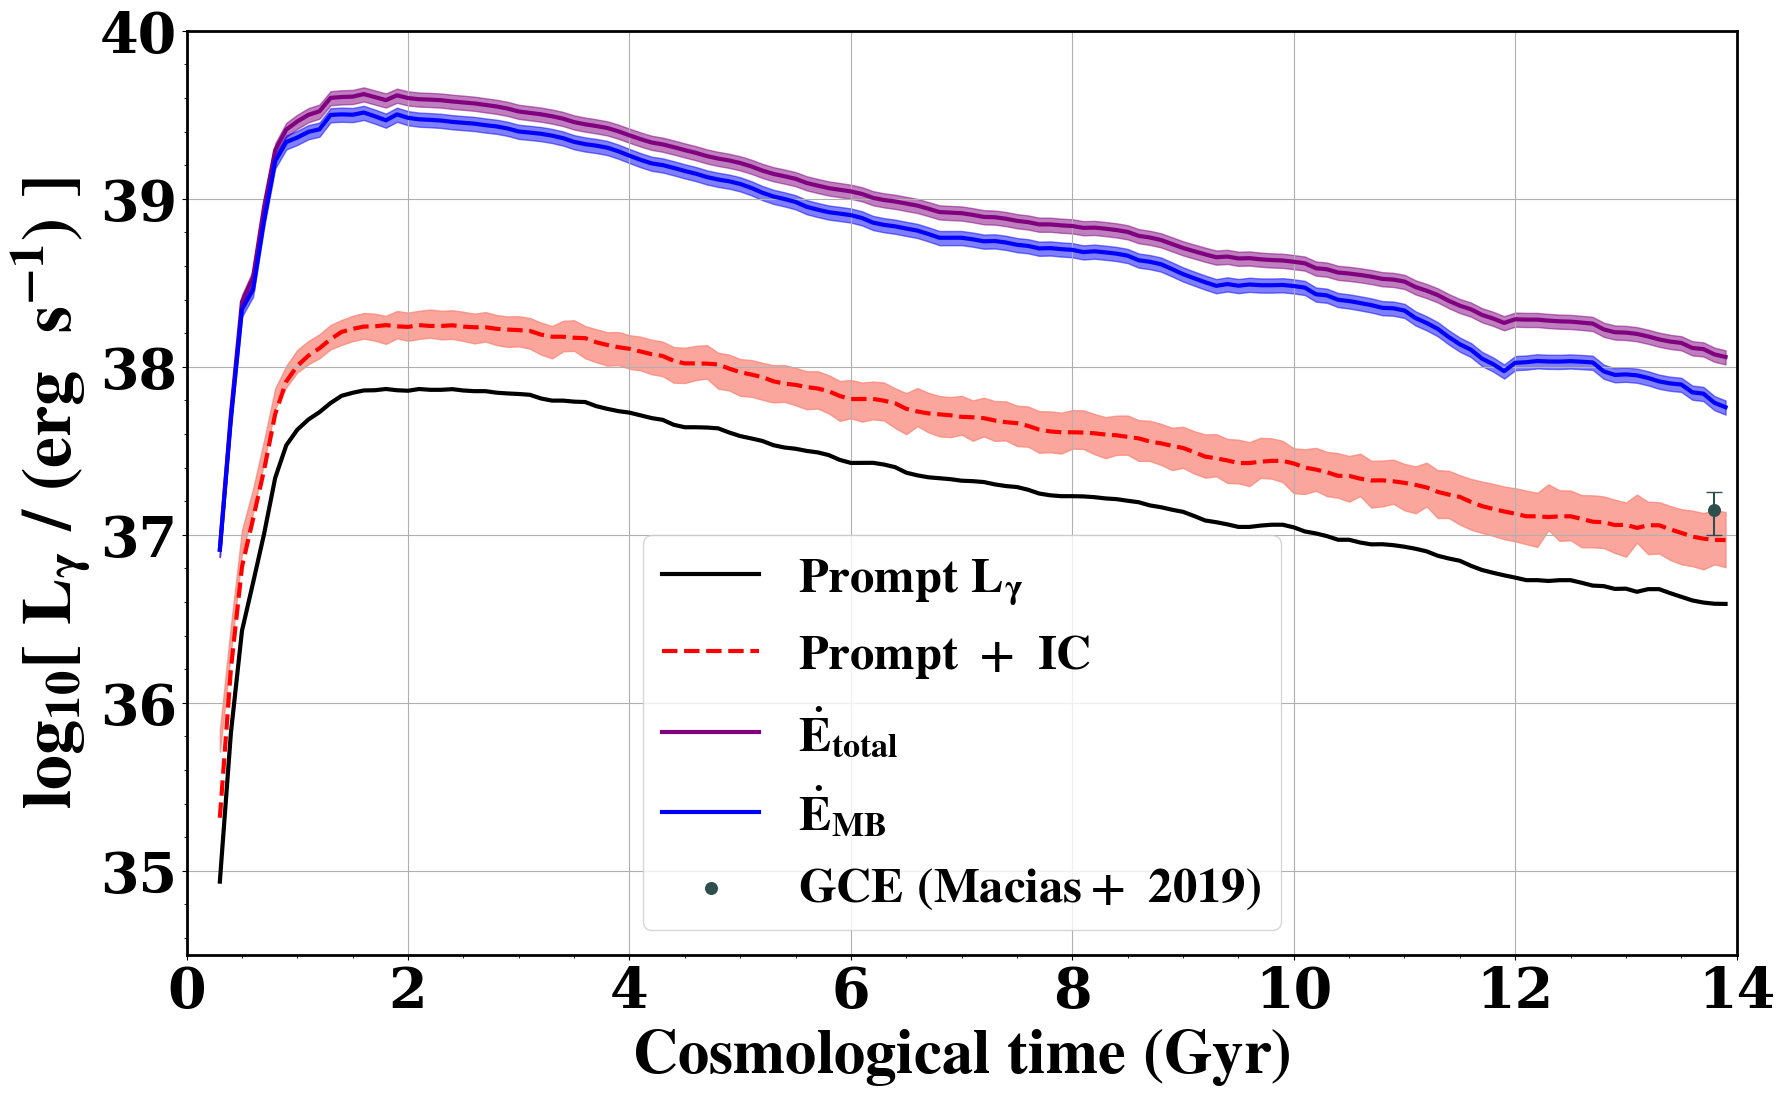

In [201]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin+12.17,xmax-2], [ymin,ymax], c = c, alpha = 1, label = label, zorder=0)
    ax.add_line(l)
    return l

def add_sub_plot(Lg_obs, u, l, c, label, ax):

    xdata = (t/1e9)
    ydata = L_int
    y_fit = pd.Series(ydata).rolling(window=2, min_periods=0, center=True).median()
#     ax.plot(t/1e9, np.log10(y_fit), c='indigo', label = r'Integrated $L_\gamma$ moving median', zorder=10)
    L_gint = y_fit
    t_agree_gamma = interpolate.InterpolatedUnivariateSpline(t/1e9, y_fit-Lg_obs).roots()[0:]
#     t_agree_gamma = [(t/1e9)[ find_nearest(y_fit, Lg_obs) ]]
    y_new = [np.log10(Lg_obs)]*len(t_agree_gamma)
#     print(t_agree_gamma)
    err = np.array([[np.log10(Lg_obs)-l, u-np.log10(Lg_obs)]]*len(t_agree_gamma)).T
    line = newline( [t_agree_gamma[0], y_new[0]], [t_agree_gamma[-1], y_new[-1]], ax,
                c=c, label=label)
    ax.fill_between(line.get_data()[0], l, u, alpha = 0.3, edgecolor=c, facecolor=c, linewidth=1,
                     label = label, zorder=1)
    plt.xlim(0,15)
    plt.ylim(34,40)
    
    return L_gint


plt.figure( figsize = (20,12) )
# plt.plot(t/1e9, np.log10(L_int), c="salmon", ms=3)
plt.ylabel(r'$\bf{\log_{10}}  \bf{ [\ L_{\gamma}\ /\ {\rm{(\bf{erg\ \ s^{-1}})}} \ ] }$', fontsize=50)
plt.xlabel(r'$\bf{Cosmological\ time\ (Gyr)}$',fontsize=45)




dt = 1e8
t = np.arange(0, 14e9, dt)
xdata = (t/1e9)
ydata = np.array(L_gamma1)
L_int = ydata
y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).median()
plt.plot(t/1e9, np.log10(y_fit), linewidth=3, c='black', label = r'$\bf{Prompt\ L_\gamma}$', zorder=3)
plt.plot(t/1e9, np.log10(y_fit*2.4), '--', linewidth=3, c="red", label = r'$\bf{Prompt\ +\ IC}$', zorder=3)


# dt = 1e8
# t = np.arange(0, 14e9, dt)
# xdata = (t/1e9)
# ydata = np.array([sum(i) for i in L_mic1])
# L_int = ydata
# y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).median()
# plt.plot(t/1e9, np.log10(y_fit), linewidth=3, c='black', label = r'$\bf{Prompt\ L_\gamma \ MIC \ Pulsars}$', zorder=3)
# # plt.plot(t/1e9, np.log10(y_fit*2.4), '--', linewidth=3, c="red", label = r'$\bf{Prompt\ +\ IC}$', zorder=3)

# dt = 1e8
# t = np.arange(0, 14e9, dt)
# xdata = (t/1e9)
# ydata = np.array(L_gamma2)
# L_int = ydata
# y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).median()
# plt.plot(t/1e9, np.log10(y_fit), linewidth=3, c='black', label = r'$\bf{Prompt\ L_\gamma 2}$', zorder=3)
# plt.plot(t/1e9, np.log10(y_fit*2.4), '--', linewidth=3, c="red", label = r'$\bf{Prompt\ +\ IC}$', zorder=3)


# Lg_obs = 1.3e37     ## erg/s     ###eckner
Lg_obs = 1.4e37     ## erg/s     ###eckner
u = np.log10(Lg_obs + 0.4e37)
l = np.log10(Lg_obs - 0.4e37)
plt.scatter(13.8, np.log10(Lg_obs), 70, color="darkslategray",
            label=r"$\bf{GCE\ (Macias+\ 2019)}$", 
            zorder = 4)
c = np.array([[np.log10(Lg_obs) - l ,-(np.log10(Lg_obs) - u)]]).T
plt.errorbar(13.8, np.log10(Lg_obs), yerr=c, linestyle="None", color="darkslategray", capsize=6)
# L_gint = add_sub_plot(Lg_obs, u, l, "olive", r"Time of interest", plt)


f_list = np.arange(0.011, 0.0134, 0.000001)
alpha_list = np.arange(-2.22, -2.02, 0.0001)
beta_list = f_list = np.arange(0.011, 0.0134, 0.000001)
alpha_list = np.arange(-2.22, -2.02, 0.0001)
beta_list = np.arange(0.77, 0.87, 0.0001)
k_bulge_list = np.arange(1.4e10, 1.7e10, 1e8)/2e9

a1 = []
dt = 1e8
t = np.arange(0, 14e9, dt)
L_int = []
f, alpha, beta = f_list[0], alpha_list[0], beta_list[-1]       ##slot-gap two-pole caustic (TPC) Gonthier 2018
kk_bulge = k_bulge_list[0]
for time in range(0,140,1):
    L_gamma = 6.8172e35 * f * (np.array(P1[time])/1e-3)**alpha * (np.array(Pdot_mdb1[time])/1e-20)**beta
    L_int.append(sum(L_gamma)*kk_bulge)
l = np.log10(copy.deepcopy(L_int))
ll = np.log10(np.array(L_int)*2.4)
L_int = []
f, alpha, beta = f_list[-1], alpha_list[-1], beta_list[0]       ##slot-gap two-pole caustic (TPC) Gonthier 2018
kk_bulge = k_bulge_list[-1]
for time in range(0,140,1):
    L_gamma = 6.8172e35 * f * (np.array(P1[time])/1e-3)**alpha * (np.array(Pdot_mdb1[time])/1e-20)**beta
    L_int.append(sum(L_gamma)*kk_bulge)
u = np.log10(copy.deepcopy(L_int))
uu = np.log10(np.array(L_int)*2.4)
# plt.fill_between(t/1e9, l, u, alpha = 0.7, edgecolor="salmon", facecolor="salmon", linewidth=1)
plt.fill_between(t/1e9, ll, uu, alpha = 0.7, edgecolor="salmon", facecolor="salmon", linewidth=1)


xdata = (t/1e9)
k_bulge = M_bulge/M_sim
ydata = np.array(E_dot1)*k_bulge
y_fit = pd.Series(ydata).rolling(window=8, min_periods=0, center=True).mean()
y_fit1 = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
y_fit = np.append(y_fit1[:20], y_fit[20:])
plt.plot(t/1e9, np.log10(y_fit), 'purple', linewidth=3, label = r"$\bf{\dot{E}_{total}}$")
u = np.log10(y_fit*M_bulge_high/(M_sim*k_bulge))
l = np.log10(y_fit*M_bulge_low/(M_sim*k_bulge))
# err = np.array([[np.log10(L)-l, u-np.log10(L)]]).T
plt.fill_between(t/1e9, l, u, alpha = 0.5, edgecolor="purple", facecolor="purple", linewidth=1)

xdata = (t/1e9)
k_bulge = M_bulge/M_sim
ydata = np.array(E_dot_mdb1)*k_bulge
y_fit = pd.Series(ydata).rolling(window=8, min_periods=0, center=True).mean()
y_fit1 = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
y_fit = np.append(y_fit1[:20], y_fit[20:])
plt.plot(t/1e9, np.log10(y_fit), 'b-', linewidth=3, label = r"$\bf{\dot{E}_{MB}}$")


u = np.log10(y_fit*M_bulge_high/(M_sim*k_bulge))
l = np.log10(y_fit*M_bulge_low/(M_sim*k_bulge))
# err = np.array([[np.log10(L)-l, u-np.log10(L)]]).T
plt.fill_between(t/1e9, l, u, alpha = 0.5, edgecolor="blue", facecolor="blue", linewidth=1)


# ydata = np.array(E_dot_mdb1)*k_bulge
# y_fit = pd.Series(ydata).rolling(window=8, min_periods=0, center=True).mean()
# #     plt.plot(t/1e9, np.log10(y_fit), 'b-', label='Estimated Bulge population total spindown power')
# plt.plot(t/1e9, np.log10(y_fit), 'green', label="E_dot2 ; Total spin-down power assuming emission from magnetic dipole braking only ", zorder = 3)
# u = np.log10(y_fit*M_bulge_high/(M_sim*k_bulge))
# l = np.log10(y_fit*M_bulge_low/(M_sim*k_bulge))
# # err = np.array([[np.log10(L)-l, u-np.log10(L)]]).T
# plt.fill_between(t/1e9, l, u, alpha = 0.5, edgecolor="yellow", facecolor="yellow", linewidth=1,
#                      label = "Error in the E_dot2 due to Bulge mass uncertainties")

# rc('text', usetex=True)


# font = font_manager.FontProperties(family='Times',
#                                    weight='bold',
#                                    style='normal', size=16)

plt.xlim(0,14)
plt.ylim(34.5,40)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.minorticks_on()
plt.grid()
plt.savefig("gamma_int.pdf")
plt.show()

77411994231.935928

In [ ]:
ydata = np.array(E_dot2)*k_bulge
y_fit = pd.Series(ydata).rolling(window=8, min_periods=0, center=True).mean()
np.savetxt("spindown-power", np.column_stack((t/1e9,y_fit)), fmt = ["%.2f","%.6e"])

In [ ]:
max(a1), min(a1), np.mean(a1)-max(a1)

In [ ]:
np.savez_compressed( "L_new", dNdL_gamma2[138])

At 13.8 Gyrs, we estimate a total spindown power of $2.89_{-0.28}^{+0.28} \times 10^{38}$ erg/s and a total prompt $\gamma$-ray of $7.528_{-1.641}^{+1.861} \times 10^{36}$ erg/s.

In [ ]:
L_gamma

In [ ]:
fig = plt.figure(figsize=(18,10))
# fig.suptitle(str(title/kt)+' Gyrs')
bins=np.histogram(np.hstack((np.log10(dNdL_gamma4[138]),np.log10(L_atnf))), bins=50)[1]

plt.hist(np.log10(dNdL_gamma4[138]), bins, zorder=3, label=r"$\bf{t_{sim}\ =\ 13.8\ Gyrs}$")

(counts, bins) = np.histogram(np.log10(L_atnf), bins)
plt.hist(bins[:-1], bins, zorder=3, label=r"$\bf{ATNF\ MSPs}$", weights=10*counts, alpha = 0.7)

# plt.hist(np.log10(dNdL_gamma1[100]), 100, alpha=0.4, zorder = 2, label="t = 10 Gyrs")
# plt.hist(np.log10(dNdL_gamma1[60]), 100, alpha=0.4, zorder=1, label="t = 6 Gyrs")
plt.xlabel(r'$\bf{\log_{10}(\frac{L_\gamma}{erg/s})}$', fontsize=30)
plt.ylabel(r'$\bf{N}$', fontsize=25)
# plt.ylim(0, 900)
plt.xlim(27, 36)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.legend(fontsize=24)
plt.savefig("L_dist_disk.pdf")
plt.show()

In [ ]:
fig = plt.figure(figsize=(18,10))
# fig.suptitle(str(title/kt)+' Gyrs')

bins=np.histogram(np.hstack((np.log10(P4[138]),np.log10(P_atnf))), bins=50)[1]

plt.hist(np.log10(P4[138]), bins, zorder=3, label=r"$\bf{t_{sim}\ =\ 13.8\ Gyrs}$")

(counts, bins) = np.histogram(np.log10(P_atnf), bins)
plt.hist(bins[:-1], bins, zorder=3, label=r"$\bf{ATNF\ MSPs}$", weights=10*counts, alpha = 0.7)

# plt.hist(np.log10(P3[100]), 100, alpha=0.4, zorder = 2, label="t = 10 Gyrs")
# plt.hist(np.log10(P3[60]), 100, alpha=0.4, zorder=1, label="t = 6 Gyrs")
plt.xlabel(r'$\bf{\log_{10}(P / s) }$', fontsize=28)
plt.ylabel(r'$ \bf{N} $', fontsize=28)
# plt.ylim(0, 900)
plt.xlim(-3.5, -0.5)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28)
plt.savefig("P_dist_disk.pdf")
plt.show()

### X-ray plots

In [153]:
M_bulge = 1.55e10
# M_sim = 7.3e8
M_sim = 2e9
k_bulge = M_bulge/M_sim

In [216]:
dt = 1e8
t = np.arange(0, 14e9, dt)
L_x_int1 = []
countx1 = []
etalist = np.arange(0.1, 0.6, 0.001)
for t_ in t:
    eta = np.random.choice(etalist, len(dNdL_x1[int(t_/dt)]))
    L_x_int1.append( np.sum(dNdL_x1[int(t_/dt)]*eta) )
    countx1.append( sum(np.array(dNdL_x1[int(t_/dt)])*4>1e36) )
L_x_int1 = np.array(L_x_int1)*k_bulge

    
# dt = 1e8
# t = np.arange(0, 15e9, dt)
# L_x_int2 = []
# countx2 = []
# for t_ in t:
#     L_x_int2.append( sum(dNdL_x2[int(t_/dt)])  )   
#     countx2.append( sum(np.array(dNdL_x2[int(t_/dt)])*2>1e36) )
    
# L_x_int2 = np.array(L_x_int2)*k_bulge

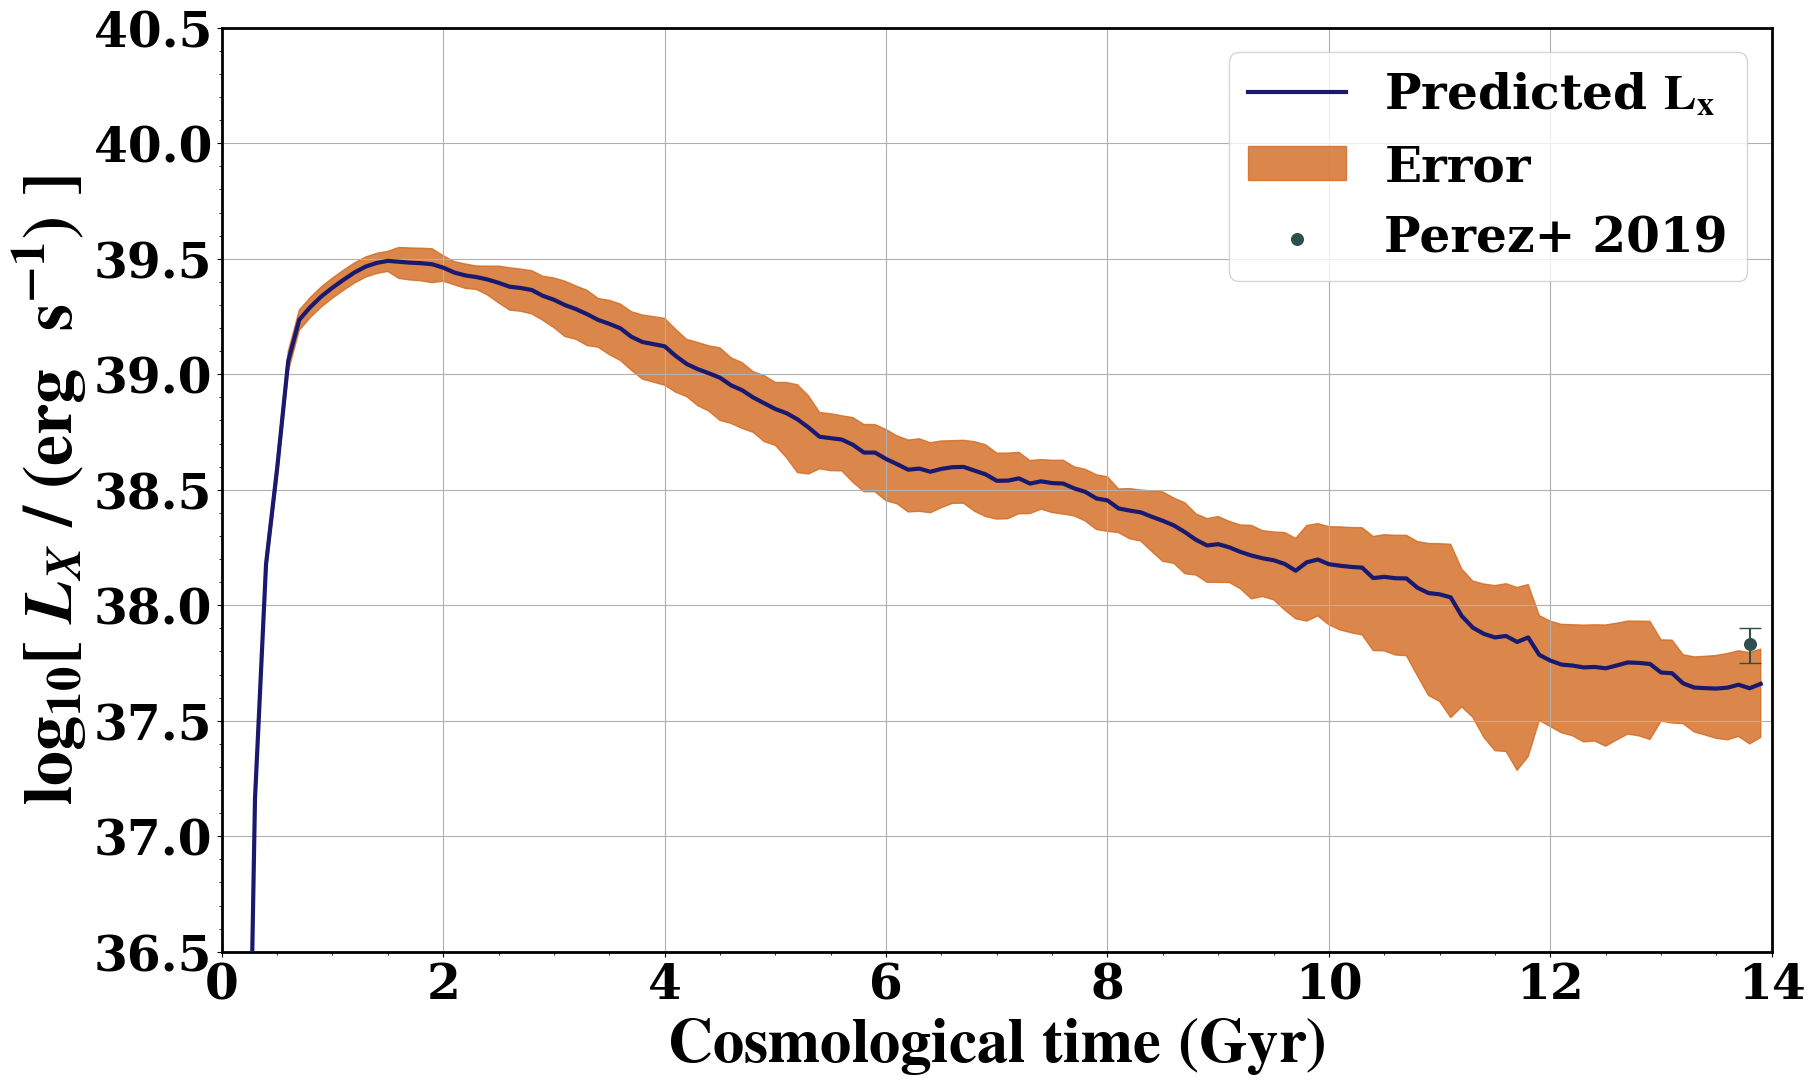

In [275]:
c = np.array(np.array(L_x_int1)).copy()
L = c
L_orig = c
# f = 1
# L = [c[i] for i in range(len(c)) if i%f==0 ]
# t = np.arange(0, t_end, dt*f)
dt = 1e8
t = np.arange(0, 14e9, dt)

plt.figure( figsize = (20,12) )
plt.ylabel(r'$\log_{10}[\ L_{X}\ /\ (\rm{erg\ \ s^{-1}})\ ]$', fontsize=50)
plt.xlabel(r'$\bf{Cosmological\ time\ (Gyr)}$', fontsize=45)


xdata = (t/1e9)
ydata = L
y_fit = pd.Series(ydata).rolling(window=14, min_periods=0, center=True).mean()
ix = 7
y_fit = np.append(ydata[:ix], y_fit[ix:])
path_deviation = pd.Series(ydata).rolling(window=14, min_periods=0, center=True).std()
a = []
idx = 16
for i in range(idx):
    a.append(y_fit[i]*0.1)
path_deviation = pd.Series(np.append(a, path_deviation[idx:]))
# print(path_deviation[1],a[1])
upper = y_fit+path_deviation
lower = y_fit-path_deviation
plt.fill_between(path_deviation.index/10, np.log10(lower), np.log10(upper), alpha=.8, 
                 edgecolor="chocolate", facecolor="chocolate", linewidth=1, label = "Error") #std curves.
plt.plot(t/1e9, np.log10(y_fit), c='midnightblue', zorder=5, linewidth=3,
         label = r'Predicted $\bf{L_x}$')



L = y_fit
# Lx_obs = 1e39     ## erg/s     ###Grimm 2002

Lx_obs = 6.8e+37                  ## Perez 2019, (3.4+-0.3e37) * (2+-0.3e10)

# t_agree_x = interpolate.InterpolatedUnivariateSpline(t/1e9, y_fit-Lx_obs).roots()[0:]
# y_new = [np.log10(Lx_obs)]*len(t_agree_x)
u = np.log10(Lx_obs + 1.183e+37)
l = np.log10(Lx_obs - 1.183e+37)
err = np.array([[np.log10(Lx_obs)-l, u-np.log10(Lx_obs)]]).T
plt.scatter(13.8, np.log10(Lx_obs), 70, color="darkslategray", label="Perez+ 2019")
plt.errorbar(13.8, np.log10(Lx_obs), yerr=err, linestyle="None", color="darkslategray", capsize=8)

# line = newline( [t_agree_x[0], y_new[0]], [t_agree_x[-1], y_new[-1]],
#                1, "darkslategray", "" )
# plt.fill_between(line.get_data()[0], l, u, alpha = 0.2, edgecolor='darkslategray', facecolor='darkslategray', linewidth=1,
#                  label = r"MW Bulge LMXB emission (Perez et al., 2019)", zorder=1)



# dt = 1e8
# t = np.arange(0, 14e9, dt)
# u = np.log10(L*1.7e10/(M_sim*k_bulge))
# l = np.log10(L*1.4e10/(M_sim*k_bulge))
# # err = np.array([[np.log10(L)-l, u-np.log10(L)]]).T
# plt.fill_between(t/1e9, l, u, alpha = 0.7, edgecolor="chocolate", facecolor="chocolate", linewidth=1,
#                      label = "Error due to mass")


plt.xlim(0,14)
plt.ylim(36.5,40.5)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.minorticks_on()
plt.grid()
plt.savefig("L_X_comp.pdf")
plt.show()

L_xint = y_fit

In [ ]:
path_deviation[600]

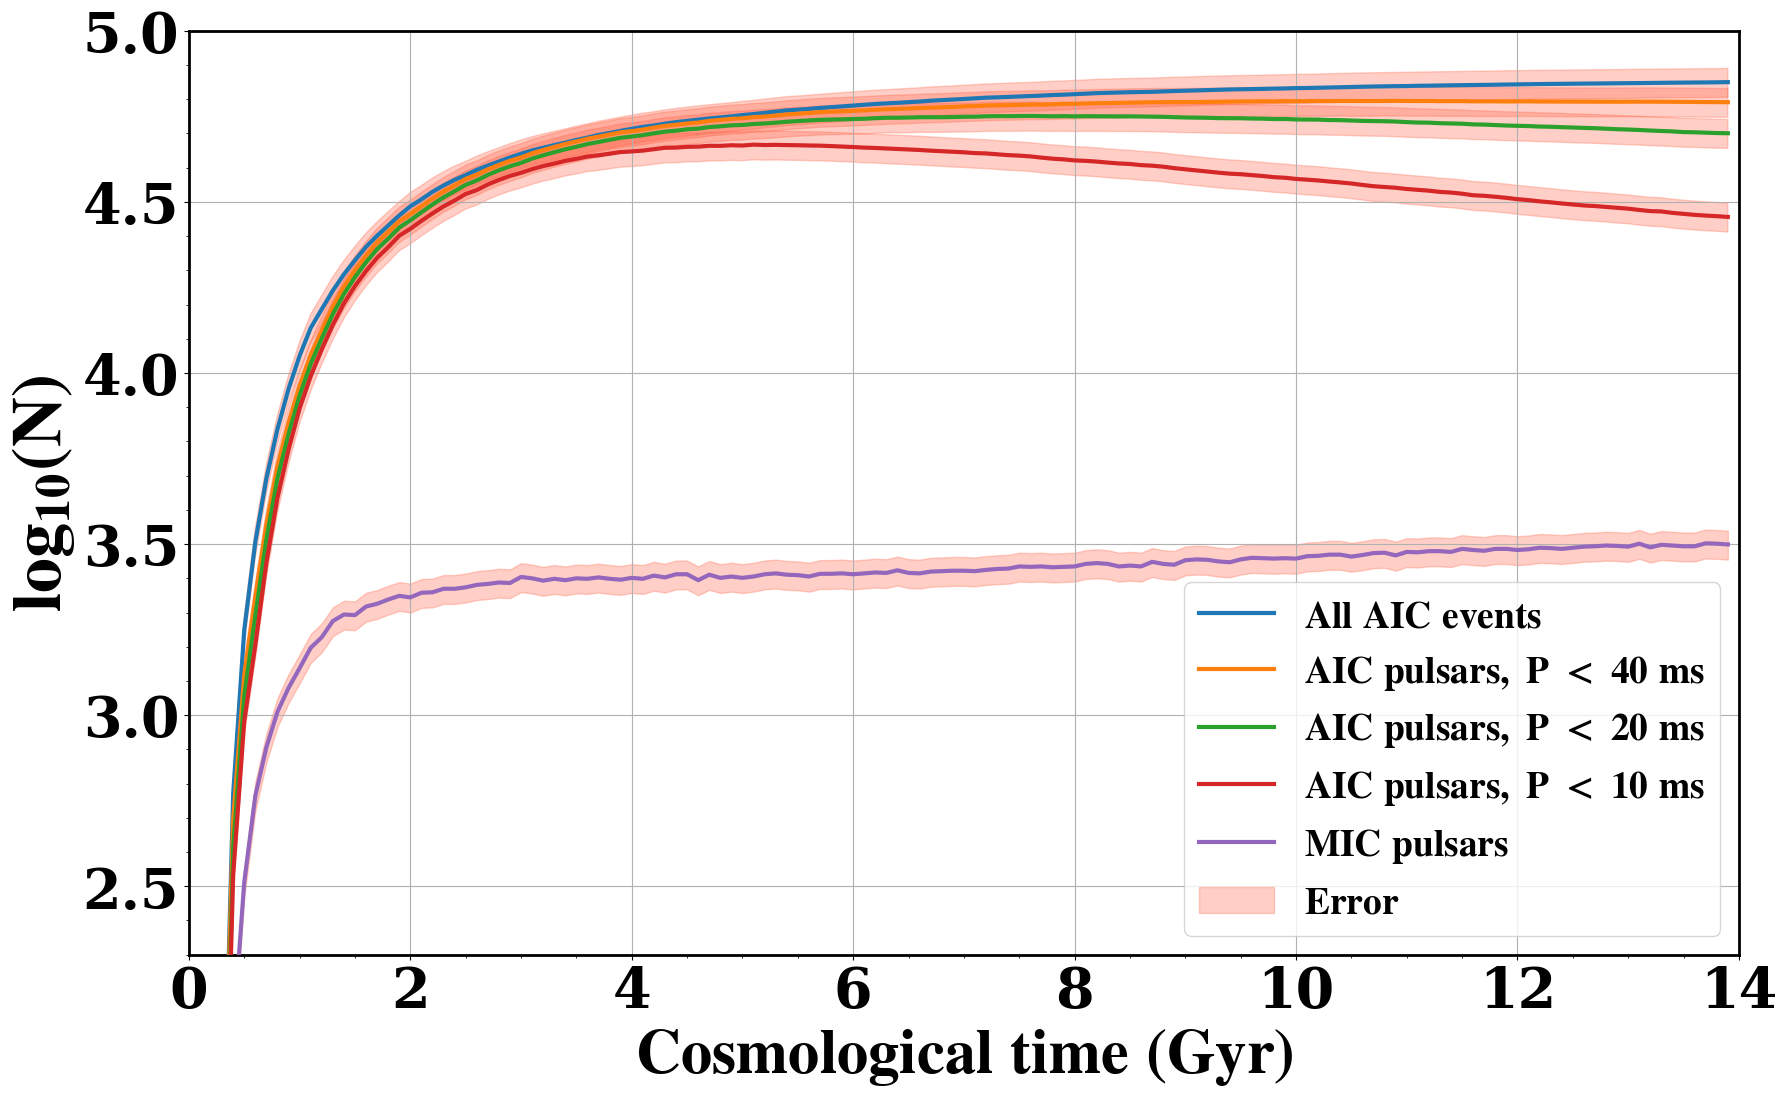

In [209]:
def plot_count(count_msp_sim, count_10, count_20, count_lmxb, k):
    t = np.arange(0, 14e9, dt)
    plt.figure( figsize = (20,12) )
    
    xdata = (t/1e9)
    ydata = count_lmxb*k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    plt.plot(t/1e9, np.log10(y_fit), linewidth = 3,label=r'$\bf{All\ AIC\ events}$', zorder = 3)
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)
    
#     plt.scatter(t/1e9, np.log10(count_msp_sim*k_bulge), 1)
    plt.plot(t/1e9, np.log10(count_msp_sim*k_bulge), linewidth = 3,label=r'$\bf{AIC\ pulsars,\ P\ <\ 40\ ms}$', zorder = 3)
    ydata = count_msp_sim *k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)
    
#     plt.scatter(t/1e9, np.log10(count_10*k_bulge), 1)
    plt.plot(t/1e9, np.log10(count_20*k_bulge), linewidth = 3,label=r'$\bf{AIC\ pulsars,\ P\ <\ 20\ ms}$', zorder = 3)
    ydata = count_20 *k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)
    
#     plt.scatter(t/1e9, np.log10(count_20*k_bulge), 1)
    plt.plot(t/1e9, np.log10(count_10*k_bulge), linewidth = 3,label=r'$\bf{AIC\ pulsars,\ P\ <\ 10\ ms}$', zorder = 3)
    ydata = count_10 *k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)
    
    plt.plot(t/1e9, np.log10(np.array(mic1)*k_bulge), linewidth = 3,label=r'$\bf{MIC\ pulsars}$', zorder = 3)
    ydata = np.array(mic1) *k_bulge
    y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).mean()
    
    y_fit_u = y_fit * (1.7e10/M_bulge)
    y_fit_l = y_fit * (1.4e10/M_bulge)
    plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1,
                         label = r"$\bf{Error}$")

    
    
    plt.ylabel(r'$\bf{\log_{10} (N)}$', fontsize=50)
    plt.xlabel(r'$\bf{Cosmological\ time\ (Gyr)\bf}$', fontsize=45)
#     plt.title('MSP count of the simulated population', fontsize=18)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.ylim(2.3,5)
    plt.xlim(0,14)
    plt.legend(fontsize=27, loc="lower right")
    plt.minorticks_on()
    plt.grid()
    plt.savefig("MSPpopulation.pdf")
    plt.show()


    
dt = 1e8
t = np.arange(0, t_end, dt)
plot_count(np.array(count_gamma1), np.array(count_gamma10), np.array(count_gamma20), np.array(aic_count), k_bulge)

In [122]:
tt = np.arange(0,14e9,int(1e8))/1e6
aic_count = [0 for _ in range(len(tt))]
unique, counts = np.unique(t_aic1, return_counts=True)
for i in range(len(tt)):
    for j in range(len(unique)):
        if tt[i] >= unique[j]:
            aic_count[i]+= counts[j]
# aic_count = aic_count[1:]
aic_count[-1], sum(counts)

(9130, 9194)

In [ ]:
unique, counts, tt[139]

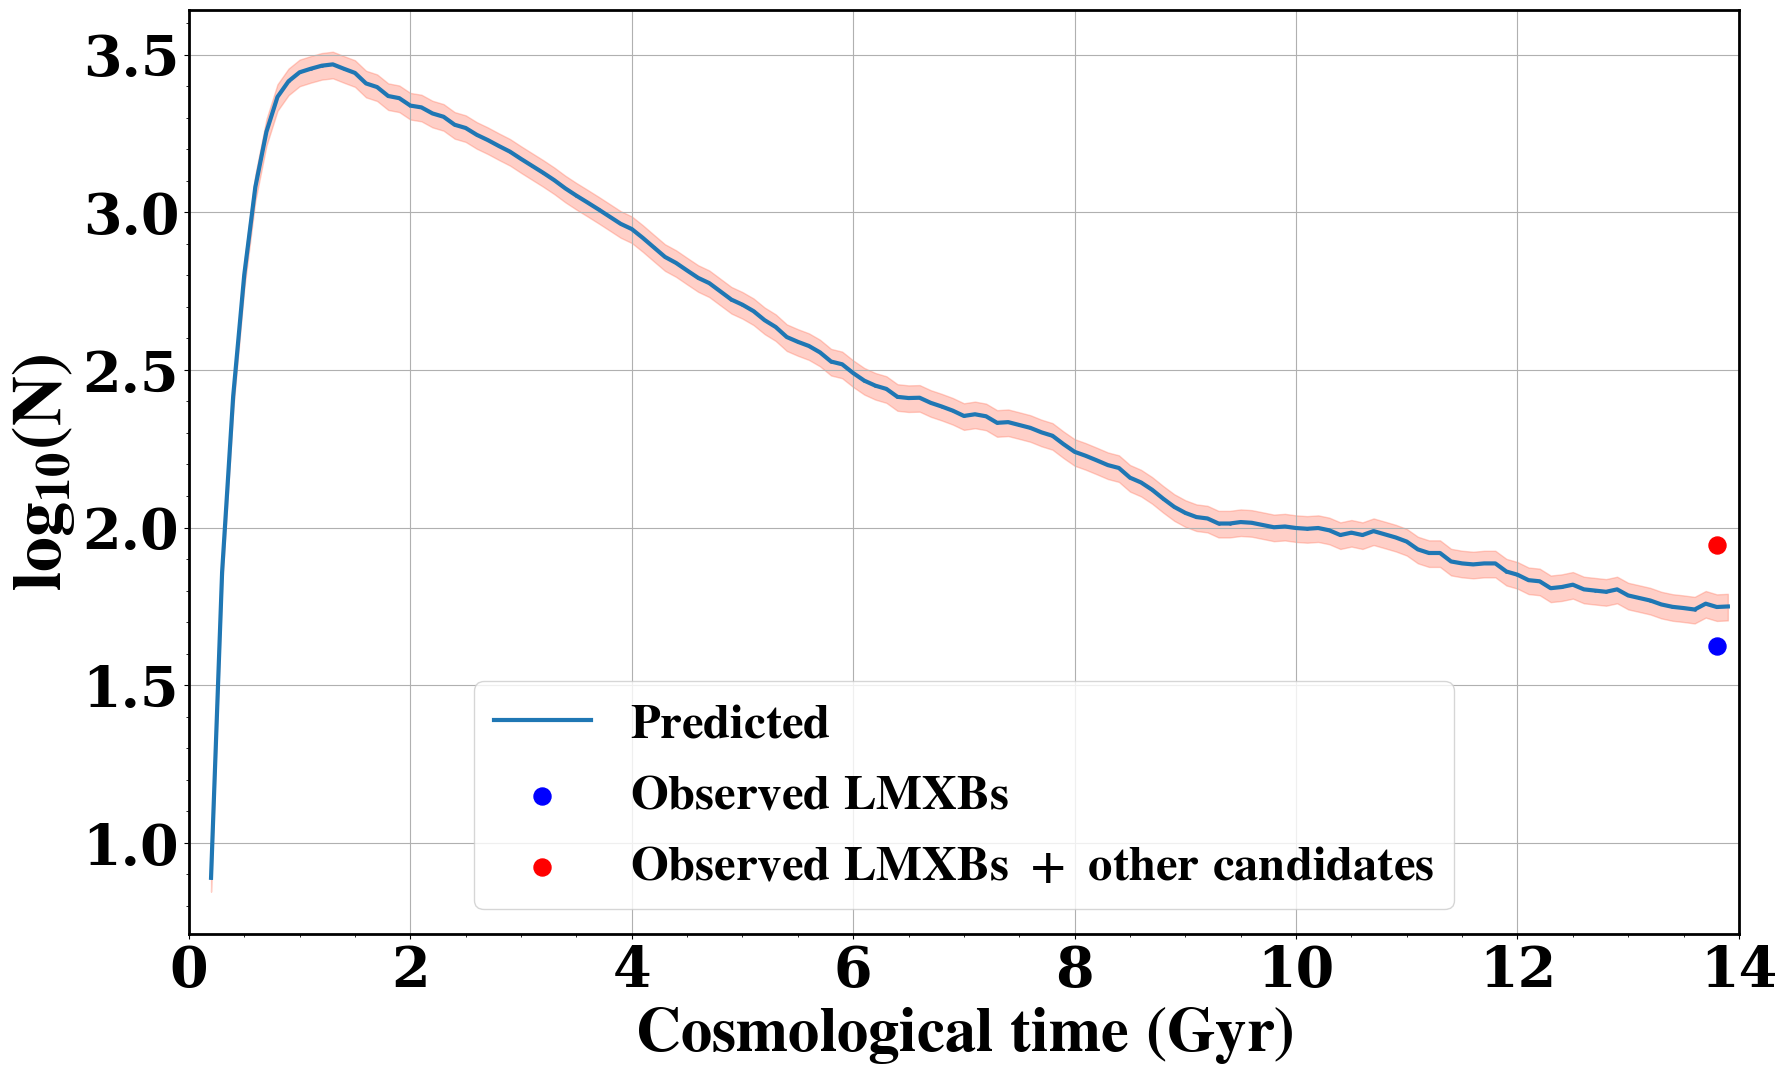

55.972222222222221

In [212]:
plt.figure(figsize=(20, 12))
count_lmxb = np.array(countx1)
xdata = (t/1e9)
ydata = count_lmxb*k_bulge
y_fit = pd.Series(ydata).rolling(window=14, min_periods=0, center=True).mean()
ydata = count_lmxb*k_bulge
y_fit1 = pd.Series(ydata).rolling(window=3, min_periods=0, center=True).mean()
y_fit = np.append(y_fit1[:25], y_fit[25:])
plt.scatter(t/1e9, np.log10(y_fit), 1)
plt.plot(t/1e9, np.log10(y_fit),label=r'$\bf{Predicted}$', zorder = 3, linewidth=3)
y_fit_u = y_fit * (1.7e10/M_bulge)
y_fit_l = y_fit * (1.4e10/M_bulge)
plt.fill_between(t/1e9, np.log10(y_fit_l),np.log10(y_fit_u), alpha = 0.3, edgecolor="tomato", facecolor="tomato", linewidth=1)

plt.scatter(t[138]/1e9, np.log10(42), 150, c="blue",label=r"$\bf{Observed\ LMXBs}$")
plt.scatter(t[138]/1e9, np.log10(88), 150, c="red",label=r"$\bf{Observed\ LMXBs\ +\ other\ candidates}$")

plt.ylabel(r'$\bf{\log_{10} (N)}$', fontsize=50)
plt.xlabel(r'$\bf{Cosmological\ time\ (Gyr)}$', fontsize=45)
#     plt.title('MSP count of the simulated population', fontsize=18)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
# plt.ylim(2.5,5)
plt.xlim(0,14)
plt.legend(fontsize=35, loc="lower center")
plt.minorticks_on()
plt.grid()
plt.savefig("LMXBpopulation.pdf")
plt.show()
y_fit[138]

In [ ]:
min(P1[30])

In [ ]:
plt.plot(t/1e9,Power1[i])


### $P, \ \dot{P},\ L \ \& \ B$ hist

In [ ]:
def live_plot(p, p_dot, L, B, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    fig.suptitle(str(title/kt)+' Gyrs')
    
    plt.subplot(221)
    n, bins, p = plt.hist(np.log10(p), 140)
    plt.xlabel('$\log(P)\ (s)$', fontsize=16)
    plt.ylabel('$ N $', fontsize=16)
    plt.ylim(0, 900)
    plt.xlim(-4, -0.1)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(222)
    plt.hist(np.log10(p_dot), 80)
    plt.xlabel(r"$\log(\dot{P})$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(-30,-12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(223)
    plt.hist(np.log10(L), 80)
    plt.xlabel(r"$\log(L) \ erg/s$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(20,38)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()
    
    plt.subplot(224)
    plt.hist(np.log10(B), 80)
    plt.xlabel(r"$\log(B) \ Gauss$", fontsize=16)
    plt.ylabel(r"$N $", fontsize=16)
    plt.xlim(7,11)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
#     plt.legend()

#     plt.savefig("disk_distributions.pdf")
    plt.show()
    
    return
    
# time = 138
# live_plot(P1[time], Pdot1[time], dNdL_gamma1[time], B1[time], (15,10), time)
# live_plot(P2[time], Pdot2[time], dNdL_gamma2[time], B2[time], (15,10), time)
    
for time in range(0, 150, 10):
    live_plot(P1[time], np.array(Pdot1[time]), dNdL_gamma1[time], B1[time], (15,10), time)
    
# for time in range(0,150,10):
#     live_plot(P2[time], np.array(Pdot2[time]), dNdL_gamma2[time], B2[time], (15,10), time)

# for time in range(0, 150, 10):
#     live_plot(P3[time], np.array(Pdot3[time]), dNdL_gamma3[time], B3[time], (15,10), time)

In [ ]:
def live_plot( t_sim, figsize=(17,10)):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
#     fig.suptitle(str(t_sim/kt)+' Gyrs', fontsize=19)
    
    plt.subplot2grid((3,4), (0,0))
    plt.hist(np.log10(P1[t_sim]),80, label=r"Accretion after AIC; $\xi = 0.5$", color="red")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
#     plt.ylabel('$ N $')
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,1))
    plt.hist(np.log10(Pdot1[t_sim]), 70, label = ' ', color="red")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,2))
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 60, label = r' ', color="red")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (0,3))
    plt.hist(np.log10(B1[t_sim]), 60, label = ' ', color="red")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,0))
    plt.hist(np.log10(P3[t_sim]), 80, label = r"Accretion after AIC; $\xi = 1.0$", color="orange")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,1))
    plt.hist(np.log10(Pdot3[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,2))
    plt.hist(np.log10(dNdL_gamma3[t_sim]), 60, label = r' ', color="orange")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (1,3))
    plt.hist(np.log10(B3[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,0))
    plt.hist(np.log10(P4[t_sim]), 80, label = r"No accretion", color="blue")
    plt.xlabel(r'$\log_{10}(\frac{P}{\rm{s}})$', fontsize=19)
    plt.ylabel("Number of pulsars", fontsize=19)
    plt.ylim(0, 600)
    plt.xlim(-4, -0.1)
    plt.legend(fontsize=19)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,1))
    plt.hist(np.log10(Pdot4[t_sim]), 60, label = ' ', color="blue")
    plt.xlabel(r"$\log_{10}(\dot{P})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 900)
    plt.xlim(-30,-12)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,2))
    plt.hist(np.log10(dNdL_gamma4[t_sim]), 60, label = r' ', color="blue")
    plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.subplot2grid((3,4), (2,3))
    plt.hist(np.log10(B4[t_sim]), 60, label = ' ', color="blue")
    plt.xlabel(r"$\log_{10}(\frac{B}{\rm{Gauss}})$", fontsize=19)
#     plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.ylim(0, 300)
    plt.legend()
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=19)
    
    plt.tight_layout()
    plt.savefig("distributions_comp_disk.pdf")
    plt.show()
    return

    
    
# for time in range(0, 150, 10):
#     live_plot( time, (28,15))

live_plot( 138, (30,18))

In [ ]:
fig = plt.figure(figsize=(22,10))
def animate( t_sim):
    plt.clf()
#     fig = plt.figure(figsize=(17,10))
    fig.suptitle(str(t_sim/kt)+r" Gyrs     $\xi = 0.5$")
    
    plt.subplot(241)
    plt.hist(np.log10(P1[t_sim]),80, label=r" ", color="red")
    plt.xlabel('$\log(P)\ (s)$')
    plt.ylabel('$ N $')
    plt.ylim(0, 500)
    plt.xlim(-4, 1)
    plt.legend()
    
    plt.subplot(242)
    plt.hist(np.log10(Pdot1[t_sim]), 70, label = ' ', color="red")
    plt.xlabel(r"$\log(\dot{P})$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(-30,-12)
    plt.legend()
    
    plt.subplot(243)
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 60, label = r' ', color="red")
    plt.xlabel(r"$\log_{10}(L_\gamma)$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 1300)
    plt.xlim(25,40)
    plt.legend()
    
    plt.subplot(244)
    plt.hist(np.log10(B1[t_sim]), 60, label = ' ', color="red")
    plt.xlabel(r"$\log(B) \ Gauss$")
    plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.legend()
    
    plt.subplot(245)
    plt.hist(np.log10(P2[t_sim]), 80, label = r' ', color="orange")
    plt.xlabel('$\log(P)\ (s)$')
    plt.ylabel('$ N $')
    plt.ylim(0, 500)
    plt.xlim(-4, 1)
    plt.legend()
    
    plt.subplot(246)
    plt.hist(np.log10(Pdot2[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log(\dot{P})$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(-30,-12)
    plt.legend()
    
    plt.subplot(247)
    plt.hist(np.log10(dNdL_gamma2[t_sim]), 60, label = r' ', color="orange")
    plt.xlabel(r"$\log_{10}(L_\gamma)$")
    plt.ylabel(r"$N $")
    plt.ylim(0, 800)
    plt.xlim(25,40)
    plt.legend()
    
    plt.subplot(248)
    plt.hist(np.log10(B2[t_sim]), 60, label = ' ', color="orange")
    plt.xlabel(r"$\log(B) \ Gauss$")
    plt.ylabel(r"$N $")
    plt.xlim(7,11)
    plt.legend()
    
    pbar.update()

    
with tqdm(total=150) as pbar:
    FFMpegWriter = manimation.writers['ffmpeg']
    writer = FFMpegWriter(fps=15, bitrate=1800)
    fig = plt.figure(figsize=(16,9))
    v_min = np.log10(min(B_sim_atnf))
    v_max = np.log10(max(B_sim_atnf))
    ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
    ani.save("P_L_Pdot_new_movie.mp4", writer=writer)
    plt.close()

In [ ]:
from labellines import labelLine, labelLines
from altair import *

def lp(i,j,c):
    checkL = [True if f==j else False for f in flags1[t_sim]]
    return plt.scatter( np.array(P1[t_sim])[np.array(checkL)], np.array(Pdot1[t_sim])[np.array(checkL)], 10, label="{:s}".format(i), 
                            alpha = 0.5, c=c)


# for t_sim in range(0,150,10):
t_sim = 138
clear_output(wait=True)
fig = plt.figure(figsize=(20,12))

# plt.scatter( atnf["period"].where(atnf["period"]<0.98), atnf["period_dot"].where(atnf["period"]<0.98), 5 , label = "ATNF", alpha = 0.5)

# plt.scatter( atnf["P0"], atnf["P1"], 20 , label = "Observed local MSPs (P < 40ms) from the ATNF catalogue", alpha = 1, color="k", zorder = 3)


if t_sim>0:
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])), alpha = 0.3)
#     plt.scatter( np.array(P1[t_sim])[np.array(P1[t_sim])<40e-3], np.array(Pdot1[t_sim])[np.array(P1[t_sim])<40e-3], 10, alpha = 0.8, label = "Simulated Bulge MSP (P < 40ms) population")
#     plt.scatter( np.array(P2[t_sim])[np.array(P2[t_sim])<40e-3], np.array(Pdot2[t_sim])[np.array(P2[t_sim])<40e-3], 20, alpha = 0.8, label = "Simulated Disk MSP (P < 40ms) population")
#         handles = [lp(i,j,c) for i,j,c in [("Dipole Braking",3,"red"), ("Propeller braking",2,"blue")]]
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])),
#                         alpha = 0.8, c=np.log10(B2[t_sim]), cmap='tab20b', vmin=v_min, vmax=v_max)
    plt.scatter( P1[t_sim], Pdot1[t_sim], 20, label = "Simulated Bulge pulsar population", 
                        alpha = 0.8, c=np.log10(B1[t_sim]), cmap='tab20b', vmin=v_min, vmax=v_max)
#         col2 = ["red" if x==True else "blue" for x in detectable2[t_sim]]
#         plt.scatter( P2[t_sim], Pdot2[t_sim], 10, label = "Simulated Bulge MSPs | estimated: %i | simulated: %i" %(len(P2[t_sim])*k_bulge, len(P2[t_sim])), 
#                     alpha = 0.3, c=col2)
#         plt.scatter(0,0, color= red, label="")
#         col1 = ["red" if x==True else "blue" for x in detectable1[t_sim]]
#         plt.scatter( P1[t_sim], Pdot1[t_sim], 10, label = "Disk MSPs | estimated: %i | simulated: %i" %(len(P1[t_sim])*k_disk, len(P1[t_sim])), 
#                     alpha = 0.8, c=col1)
    cbar = plt.colorbar()
    cbar.set_label(r"$\log_{10}(\frac{B}{\rm G})$", fontsize=32)
    cbar.ax.tick_params(labelsize=29)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), fontsize=28, loc="upper left")
#     plt.legend(handles=handles, fontsize=23, loc="upper left")
plt.xlabel('$P \ (s)$', fontsize=30)
plt.ylabel('$ \dot{P} $', fontsize=30)
plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.title("t = "+str(t_sim/10)+' Gyrs simulation time', fontsize=29)
plt.ylim(1e-24,1e-15)
plt.xlim(5e-4,0.9)
#     plt.plot(P__, Pdot_1e8, label = r"$10^8$ yrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_1e9, label = r"$10^9$ yrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_14e9, label = r"$14$ Gyrs", color='k', alpha =0.5, zorder=2)
#     plt.plot(P__, Pdot_spinup, label = r"max spin-up line", color='gray')
#     plt.plot(P__, Pdot_1e9G, label = r"$10^{%0.2f}$ G"%v_min, color='k', alpha =0.5, zorder=2)
# labelLines(plt.gca().get_lines(), zorder=0.9, fontsize=15)

plt.savefig("ppdot.pdf")
plt.show()

In [ ]:
max(np.where(flags1[138]==2, 0, P1[138]))

In [ ]:
v_min = np.log10(min(B_sam))
v_max = np.log10(max(B_sam))

In [ ]:
def pdotcal1(p,tau):
    return p/(2*tau* 3.154e+7)
P__ = np.arange(1e-4, 1, 1e-4)
Pdot_1e7 = pdotcal1(P__, 1e7)
Pdot_1e8 = pdotcal1(P__, 1e8)
Pdot_1e9 = pdotcal1(P__, 1e9)
Pdot_14e9 = pdotcal1(P__, 14e9)

In [ ]:
def pdotcal2(p,b):
    return (b / 3.1782086e+19)**2 / p
# Pdot_1e7G = pdotcal1(P__, 1e7)
Pdot_1e9G = pdotcal2(P__, 10**v_min)

In [ ]:
def spinupline(p):
    return 10**(-15.5)*p
# Pdot_1e7G = pdotcal1(P__, 1e7)
Pdot_spinup = spinupline(P__)

In [ ]:
checkL = np.array([True if f==2 else False for f in flags1[138]])
plt.scatter( np.array(P1[138])[checkL], np.array(Pdot1[138])[checkL], 10, label="{:s}".format("A"), 
                            alpha = 0.5, c="blue")

### Movie

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='P-Pdot_bulge_noacc', artist='Matplotlib',
                comment='-')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)


fig = plt.figure(figsize=(16,9))

def animate(t_sim):
    plt.clf()
    handles = []
    if t_sim>0:
        checkLa = np.array([True if f==2 else False for f in flags1[t_sim]], dtype=bool)
        checkLb = np.array([True if f==3 else False for f in flags1[t_sim]], dtype=bool)
        
        bins=np.histogram(np.log10(dNdL_gamma1[t_sim]), 
                          bins=100)[1] #get the bin edges
        handles.append(plt.scatter( np.array(P1[t_sim])[checkLa], np.array(Pdot1[t_sim])[checkLa], 10, label="Pulsars undergoing propeller braking", 
                            alpha = 0.5))
#         handles.append(plt.hist( np.log10(np.array(dNdL_gamma1[t_sim])[checkLa]), bins=bins, label="Propeller braking", 
#                             alpha = 0.5, color="blue"))
        handles.append(plt.scatter( np.array(P1[t_sim])[checkLb], np.array(Pdot1[t_sim])[checkLb], 10, label="Pulsars undergoing dipole Braking", 
                            alpha = 0.5))
#         handles.append(plt.hist( np.log10(np.array(dNdL_gamma1[t_sim])[checkLb]), bins=bins, label="Dipole Braking", 
#                             alpha = 0.5, color="red"))

        plt.legend(fontsize=20, loc="upper left")
        
#     plt.xlabel(r"$\log_{10}(\frac{L_\gamma}{\rm{erg/s}})$", fontsize=20)
#     plt.ylabel('$N$', fontsize= 20)
    plt.xlabel('$P \ (s)$', fontsize=20)
    plt.ylabel('$ \dot{P} $', fontsize= 20)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title(str(t_sim/kt)+' Gyrs', fontsize=20)
#     plt.ylim(0,800)
#     plt.xlim(20, 40)
    plt.ylim(1e-24,1e-15)
    plt.xlim(1e-4,0.95)
#     plt.plot(P__, Pdot_1e8, label = r"$10^8$ Gyrs", color='k')
#     plt.plot(P__, Pdot_1e9G, label = r"$10^{7.6}$ G", color='k')
#     labelLines(plt.gca().get_lines(), zorder=0.5, fontsize=15)
    
ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
ani.save("PPdot_movie.mp4", writer=writer)
plt.close()

### Characteristic Age Distribution

In [ ]:
tau = []
for t_sim in range(0,15,1):
    tau.append( np.array(P1[t_sim])/(2*np.array(Pdot1[t_sim])*3.154e+7) )

In [ ]:
for t_sim in range(0,15,1):
    fig = plt.figure(figsize=(16,9))
    clear_output(wait=True)
    plt.hist(np.log10(tau[t_sim]), log=True, bins = 20)
    plt.title(str(t_sim)+' Gyrs')
    plt.ylim(0.1,1e5)
    plt.xlim(4, 14)
    plt.xlabel(r"$log_{10} (\frac{\tau}{\rm{yrs}})$", fontsize=18)
    plt.ylabel(r"$\rm{d}N/\rm{d} \tau $", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

In [ ]:
find_nearest(tau, -np.inf)

In [ ]:
P2[300][33]

In [ ]:
Pdot2[300][33]

#### Birth-times

In [ ]:
plt.figure(figsize=(10, 8))
n, edges = np.histogram(birthtimes1,100)
plt.semilogy(edges[:-1]/1e3, n, label="Disk")
n, edges = np.histogram(birthtimes2,100)
plt.semilogy(edges[:-1]/1e3, n, label="Bulge")
plt.ylabel(r'$\frac{\rm{d}N(t)}{\rm{d}t}$', fontsize=18)
plt.xlabel('Time since formation (Gyr)', fontsize=16)
plt.title('Binary birth rate', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## $\gamma$-ray luminosity hist

In [ ]:
fig = plt.figure(figsize=(10,8))
def animate(t_sim):
    plt.clf()
    plt.hist(np.log10(dNdL_gamma1[t_sim]), 70, alpha=0.3, label = "No accretion after AIC")
#     plt.hist(np.log10(dNdL_gamma2[t_sim]), 70, alpha=0.3, label = "Accretion after AIC")
    plt.xlim(25, 37)
#     plt.ylim(0, 1000)

    plt.title(str(t_sim/kt)+' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$", fontsize=18)
    plt.ylabel(r"$\frac{\rm{d}\ N}{\rm{d} \ \log_{10} (L_\gamma)} $", fontsize=18)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend(fontsize=16)

    

FFMpegWriter = manimation.writers['ffmpeg']
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)
fig = plt.figure(figsize=(16,9))
v_min = np.log10(min(B_sim_atnf))
v_max = np.log10(max(B_sim_atnf))
ani = manimation.FuncAnimation(fig, animate, frames=1500, repeat=False)
ani.save("L_gamma_dist_movie.mp4", writer=writer)
plt.close()

# for time in range(0, 150, 5):
#     animate(dNdL_gamma1[time], dNdL_gamma2[time], (12,8), time)

In [ ]:
t = np.arange(0, t_end, 1e8)
detec = []
y = []
z = []
for time in range(160):
    j = np.log10(dNdL_gamma1[time])
    detec.append( int(sum(i > np.log10(7.36e33) for i in j)*k_bulge) )
    y.append( int(sum(i > 32 for i in j)*k_bulge) )
    z.append( int(sum(i > 0.1 for i in j)*k_bulge) )
    

## X-ray Luminosity distribution

In [ ]:
from IPython.display import clear_output

def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    n, bins, p = plt.hist(np.log10(np.where(data>0, dNdL_x2[time], 1)), log=True,  bins = 50)
    
#     n, edges = np.histogram(np.log10(data), 300)
#     plt.scatter( edges[:-1], np.log10(edges[:-1]) )
    plt.xlim(20, 40)
    plt.ylim(1, 4000)

    plt.title(str(title/100)+' Gyrs')
    plt.xlabel(r"$\log(L_X)$")
    plt.ylabel(r"$\log(N) $")
    plt.show();
    
# for time in range(0, 150, 10):
#     live_plot(np.array(dNdL_x1[time]), (12,8), time)

time = 1380
live_plot(np.array(dNdL_x1[time]), (12,8), time)

In [ ]:
def live_plot(data, figsize=(7,5), title=''):
    clear_output(wait=True)
    fig = plt.figure(figsize=figsize)
    n, bins, p = plt.hist(np.log10(data), log=True, bins=60)

#     n, edges = np.histogram(np.log10(data), 300)
#     plt.scatter( edges[:-1], np.log10(edges[:-1]) )
    plt.xlim(25, 40)
#     plt.ylim(0, 350)

    plt.title(str(title)+' Gyrs')
    plt.xlabel(r"$\log(L_X)$")
    plt.ylabel(r"$N $")
    plt.show();
    
for time in range(1, 15):
    live_plot(dNdL_xns[time], (12,8), time)

# time = 12
# live_plot(dNdL_x[time], (12,8), time)

### Dominant braking type

In [ ]:
br = [i[2] for i in flags1[49:]]
t = np.arange(0, t_end, 1e7)
fig = plt.figure(figsize=(13, 4))
ax = fig.add_subplot(1,1,1)
fig.canvas.draw()
for i in range(len(br)):
    if br[i] == 1:
        ax.scatter(np.array(t[i])/1e9, 1, marker="|", c="green", s=1000, linewidth=0.5, label="GW radiation", alpha = 1)
    if br[i] == 2:
        ax.scatter(np.array(t[i])/1e9, 1, marker="|", c="mediumpurple", s=1000, linewidth=0.5, label="Propeller braking", alpha = 1)
    if br[i] == 3:
        ax.scatter(np.array(t[i])/1e9, 1, marker="|", c="tomato", s=1000, linewidth=0.5, label="Dipole braking", alpha = 1)
plt.yticks([1])
ax.grid(False)
ax.set_yticklabels([" "])
plt.xlabel(r"Cosmological time (Gyrs)", fontsize=20)
# plt.ylabel(r"Braking type", fontsize=20)
plt.title(r"Braking type", fontsize=20)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18)
plt.xlim(0,14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# plt.savefig("braking.pdf")
plt.show()

In [ ]:
flags1[46]

## $L_\gamma \frac{dN}{dL_\gamma} $

In [ ]:
# time = 138
for time in range(0,150,10):
    clear_output(wait=True)
    a = dNdL_gamma1[time]
#     n, edges = np.histogram(np.log10(a),60)
    # print(n, edges)
    checkLa = np.array([True if f==2 else False for f in flags1[time]], dtype=bool)
    checkLb = np.array([True if f==3 else False for f in flags1[time]], dtype=bool)

    bins = np.histogram(np.log10(dNdL_gamma1[time]), 
                      bins=100)[1] #get the bin edges
#         handles.append(plt.scatter( np.array(P1[t_sim])[checkL], np.array(Pdot1[t_sim])[checkL], 10, label="Propeller braking", 
#                             alpha = 0.5, c="blue"))
    plt.figure(figsize=(10,7))
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLa])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Propeller braking", 
                            alpha = 0.5, c="blue")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLb])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Dipole braking", 
                            alpha = 0.5, c="red")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    plt.title(str(time/kt) + ' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$")
    plt.ylabel(r"$L_\gamma\frac{dN}{d \log(L_\gamma)}$")
    # plt.savefig("L dNdL gamma")
    plt.xlim(12.5,36)
    plt.ylim(12.5,36)
    plt.show();

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='P-Pdot_bulge_noacc', artist='Matplotlib',
                comment='-')
writer = FFMpegWriter(fps=15, metadata=metadata, bitrate=1800)


fig = plt.figure(figsize=(16,9))
def animate(time):
    plt.clf()
    handles = []
    checkLa = np.array([True if f==2 else False for f in flags1[time]], dtype=bool)
    checkLb = np.array([True if f==3 else False for f in flags1[time]], dtype=bool)

    bins = np.histogram(np.log10(dNdL_gamma1[time]), 
                      bins=100)[1] #get the bin edges
#         handles.append(plt.scatter( np.array(P1[t_sim])[checkL], np.array(Pdot1[t_sim])[checkL], 10, label="Propeller braking", 
#                             alpha = 0.5, c="blue"))
    
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLa])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Propeller braking", 
                            alpha = 0.5, c="blue")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    n, edges = np.histogram(np.log10((np.array(dNdL_gamma1[time])[checkLb])), bins)
    plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="Dipole braking", 
                            alpha = 0.5, c="red")
    plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
                           
    plt.title(str(time/kt) + ' Gyrs')
    plt.xlabel(r"$\log(L_\gamma)$")
    plt.ylabel(r"$L_\gamma\frac{dN}{d \log(L_\gamma)}$")
    # plt.savefig("L dNdL gamma")
    plt.xlim(12.5,36)
    plt.ylim(12.5,36)
    plt.legend()
    
    
ani = manimation.FuncAnimation(fig, animate, frames=150, repeat=False)
ani.save("LdNdL_movie.mp4", writer=writer)
plt.close()

## $L_x \frac{dN}{dL_x} $

In [ ]:
plt.figure(figsize=(16,7))
plt.suptitle("X-ray luminosity function")

time = 13


plt.subplot(121)
a = dNdL_xwd[time]
n, edges = np.histogram(np.log10(a),60)
plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), c='blue' )
xdata = edges[:-1]
ydata = np.log10(n*10**edges[:-1])
y_fit = pd.Series(ydata).rolling(window=1, min_periods=0, center=True).median()
plt.plot( edges[:-1], y_fit )
plt.title(str(time) + ' Gyrs')
plt.xlabel(r"$\log(L_x)$")
plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")


plt.subplot(122)
a = dNdL_xns[time]
n, edges = np.histogram(np.log10(a),60)
plt.scatter( edges[:-1], np.log10(n*10**edges[:-1]), label="NSs only" )
# plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
plt.title(str(time) + ' Gyrs')
plt.xlabel(r"$\log(L_x)$")
plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")
plt.legend()

# plt.savefig("L dNdL X")
plt.show();

In [ ]:
for time in range(1, 15):
    clear_output(wait=True)

    plt.figure(figsize=(16,7))
    a = dNdL_xwd[time]
    n, edges = np.histogram(np.log10(a),60)
    plt.scatter( edges[:-1], n, c='blue' )

    a = dNdL_xns[time]
    n, edges = np.histogram(np.log10(a),60)
    plt.scatter( edges[:-1], n, color='red')
    # plt.plot( edges[:-1], np.log10(n*10**edges[:-1]) )
    
    plt.hist(np.log10(dNdL_xns[time]), 60, alpha = 0.3)
    plt.hist(np.log10(dNdL_xwd[time]), 60, alpha = 0.3)
    plt.title(str(time) + ' Gyrs')
    plt.xlabel(r"$\log(L_x)$")
    plt.ylabel(r"$L_x\frac{dN}{d \log(L_x)}$")
#     plt.xlim(20,42)
#     plt.ylim(20,42)
    plt.show()
    time_module.sleep(0.5)

In [ ]:
a = dNdL_xns[1]
np.log10(a)*np.log10(np.exp(1))

In [ ]:
edges

#### Power

In [ ]:
t = np.arange(0, t_end, 1e9)
plt.figure( figsize = (8,5) )
# plt.scatter(t/1e9, np.log10(count_msp), 1)
plt.plot(t/1e9, Power)
plt.ylabel('Power')
plt.xlabel('(Time since formation (Gyr) )')
plt.show()

### Sim vs. Obs

In [277]:
data = np.genfromtxt("bulge_data.csv", delimiter=',')    ## galactic longitude, latitude, distance, flux, and luminosity

In [278]:
F = data[:,3]
L = data[:,4]

In [ ]:
# # atnf = pd.read_csv("atnf_pulsar_cat.txt", sep=";")
# atnf = pd.read_csv("atnf_bin_msps.txt", sep=";")
# data_ = pd.read_csv("fermi_4fgl.txt",sep='|')
# F_fermi4fgl = data_['energy_flux'].astype(float)

In [ ]:
# L_atnf = []
# for i in range(0, len(atnf['EDOT'])):
#     if atnf['P0'][i]<40e-3:
#         L_atnf.append(atnf['EDOT'][i]*0.1)
# P = []    
# for i in range(0, len(atnf['P0'])):
#     if atnf['P0'][i]<40e03:
#         P.append(atnf['P0'][i])
        
# B = []    
# for i in range(0, len(atnf['P0'])):
#     if atnf['P0'][i]<40e03:
#         B.append(atnf['BSURF'][i])


In [ ]:
E = np.arange(0.1, 100, 0.1)
Ecut = 3.78
a = -1.57
A = 1.33e-7
alow = -1.59
ahigh = -1.56
Ecutlow = 3.7
Ecuthigh = 3.93


In [ ]:
plt.figure(figsize=(14, 8))
for k in np.arange(0.3,0.4, 0.01):
#     clear_output(wait=True)
    blist = np.arange(k, 1, 0.001)
    b = np.random.choice(blist, len(F))
    dNdE = []
    for i in range(len(F)):
        dNdE.append( A * E**a/Ecut**(1+a) * np.exp(-(E/Ecut)**b[i]) )
    dNdE_tot = sum(dNdE)
    E = np.arange(0.1, 100, 0.1)
    dE = 100-0.1
    y_fit = pd.Series(dNdE_tot).rolling(window=1, min_periods=0, center=True).median()
    plt.semilogx(E, E**2*y_fit/min(E**2*y_fit), label = r"$%.2f<\beta<1$"%k)  ## *E**2*0.00160218
# plt.loglog(x, sens)
# 0.00160218 GeV to erg
# plt.legend(fontsize = 20)
# plt.ylabel(r"Normalised $E^2 dN/dE \ \ \rm (GeV \ cm^{-2}\  s^{-1})$", fontsize = 30)
plt.ylabel(r"Normalised $E^2 dN/dE \ \ \rm (Arb. Units)$", fontsize = 30)
plt.xlabel("E (GeV)",fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
# plt.ylim(1,1e2)
plt.show()

In [279]:
gcespec = np.genfromtxt("GCEspec.csv", delimiter=',')    ## galactic longitude, latitude, distance, flux, and luminosity
gce = np.genfromtxt("gce.csv", delimiter=',')
gcehigh = np.genfromtxt("gcehigh.csv", delimiter=',')
gcelow = np.genfromtxt("gcelow.csv", delimiter=',')

In [280]:
macias = np.genfromtxt("BoxyBulge_spectra_Macias_etal_2019.dat")

In [281]:
Ee = macias[:,2]
E2dNdE = macias[:,3]

In [283]:
l, u = 0.1, 100
E = np.arange(l, u, 0.1)
Ecut = 3.78
a = -1.57
A = 1.33e-7
alow = -1.59
ahigh = -1.56
Ecutlow = 3.7
Ecuthigh = 3.93
blist = np.arange(0.1, 1, 0.01)
b = np.random.choice(blist, len(F))
dNdE = []
dNdElow = []
dNdEhigh = []
for i in range(len(F)):
    dNdE.append( A * E**a/Ecut**(1+a) * np.exp(-(E/Ecut)**b[i]) )
    dNdElow.append( A * E**alow/Ecutlow**(1+a) * np.exp(-(E/Ecutlow)**b[i]) )
    dNdEhigh.append( A * E**ahigh/Ecuthigh**(1+a) * np.exp(-(E/Ecuthigh)**b[i]) )


In [284]:
dNdE_tot = sum(dNdE)/len(F)
dNdE_totlow = sum(dNdElow)/len(F)
dNdE_tothigh = sum(dNdEhigh)/len(F)

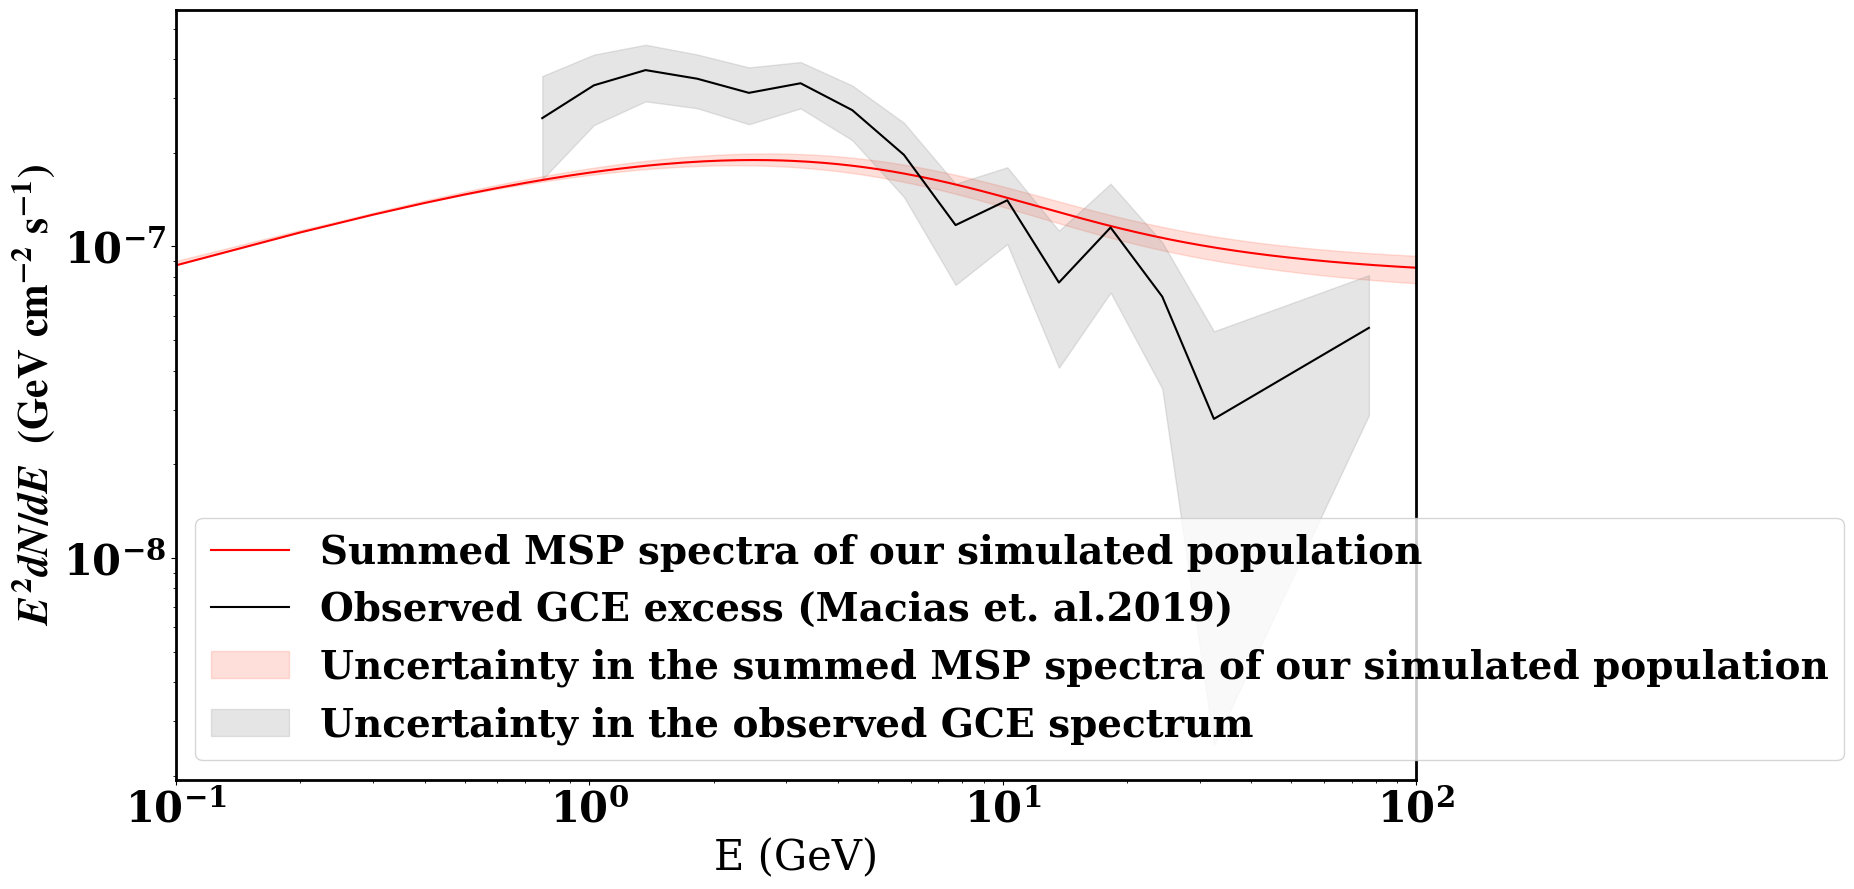

In [285]:
plt.figure(figsize=(16, 10))
# E = np.arange(0.1, 100, 0.1)
# dE = 100-0.1
# plt.loglog(gce[:,0], gce[:,1], label = r"Observed GCE excess (Linden et. al.2016)", c="black")  ## *E**2*0.00160218
# u = gcehigh[:,1]
# l = gcelow[:,1]
# plt.fill_between(gce[:,0], l, u, alpha = 0.2, edgecolor="grey", facecolor="grey", linewidth=1,
#                      label = r"Uncertainty in the observed GCE spectrum")

plt.loglog(E, E**2*(dNdE_tot), c="red", label ="Summed MSP spectra of our simulated population")  ## *E**2*0.00160218 , label = r"$%.2f<\beta<1$"%k
l = E**2*(dNdE_totlow)
u = E**2*(dNdE_tothigh)
plt.fill_between(E, l, u, alpha = 0.2, edgecolor="tomato", facecolor="tomato", linewidth=1,
                     label = r"Uncertainty in the summed MSP spectra of our simulated population")


plt.loglog(Ee, E2dNdE, label = r"Observed GCE excess (Macias et. al.2019)", c="black")
u = E2dNdE+np.sqrt(macias[:,4]**2 +macias[:,5]**2)
l = E2dNdE-np.sqrt(macias[:,4]**2 +macias[:,5]**2)
plt.fill_between(Ee, l, u, alpha = 0.2, edgecolor="grey", facecolor="grey", linewidth=1,
                     label = r"Uncertainty in the observed GCE spectrum")

# plt.loglog(x, sens)
# 0.00160218 GeV to erg
# plt.legend(fontsize = 20)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylabel(r"$E^2 dN/dE \ \ \rm (GeV \ cm^{-2}\  s^{-1})$", fontsize = 30)
# plt.ylabel(r"Normalised $E^2 dN/dE \ \ \rm (Arb. Units)$", fontsize = 30)
plt.legend(fontsize = 28)
plt.xlabel("E (GeV)",fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.xlim(0.1,1e2)
plt.show()

In [ ]:
gce[:,1]

In [286]:
sens = [2.8e-11, 7.5e-13, 9e-14, 6.5e-14, 5e-13, 7e-13]
x = [20, 100, 1e3, 1e4, 1e5, 3e5]

In [ ]:
plt.figure(figsize=(14,8))
for i in range(len(F)):
    plt.loglog(E, E**2*dNdE[i]*0.00160218)  ## *E**2*0.00160218
# plt.loglog(x, sens)
# 0.00160218 GeV to erg
# plt.legend(fontsize = 20)
plt.ylabel(r"$E^2 dN/dE \ \ \rm (erg \ cm^{-2}\  s^{-1})$",fontsize = 20)
plt.xlabel("E (GeV)",fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
# plt.xlim(1,10000)
plt.show()

In [332]:
data = np.genfromtxt("bulge_data_new.csv", delimiter=',')    ## galactic longitude, latitude, distance, flux, and luminosity
F = data[:,3]
L = data[:,4]
d = data[:,2]
# L_n = np.load("L_new.npz", allow_pickle=True)
# L_n = L_n.f.arr_0
L_n = np.array(dNdL_gamma1[138])
L = L_n * 2.4
F_n = []
for i in range(len(L_n)):
    F_n.append( L_n[i]/(4*np.pi*np.random.choice(d*3.086e+21)**2) )
F = F_n

In [289]:
def dNdE_calc(data):
    l = 0.1
    u = 1000
#     E = np.linspace(l, u, int(400))
    E = np.arange(l, u, 0.1)
    dE = u-l
#     E = macias[:,2]
#     dE = E[-1] - E[0]
    Ecut = data[:,10]/1e3
    Gamma = data[:,9]
    intF = []
    K = []
    dNdE = []
    with tqdm(total=len(F)) as pbar:
        for i in range(len(F)):
            dnde = E**(-Gamma[i]) * np.exp(-(E/Ecut[i])**(2/3)) 
            intF.append( np.trapz(E*dnde, dx=dE) )
            K.append( F[i]*624.151/intF[i] )
            dNdE.append(dnde*K[i])
            pbar.update()
    return dNdE

dNdEall = []
# for i in range(8):
#     data = np.genfromtxt("data_bulge_disk/MCMC_%i_sim_res_pops_bulge_underlying_data.csv"%(i+1), delimiter=',')
#     dNdEall.append(np.array(dNdE_calc(data))*624.151)
# data = np.genfromtxt("MCMC_random_best_bulge_data.csv", delimiter=',')
data = np.genfromtxt("bulge_data_new.csv", delimiter=',')
dNdEall.append(np.array(dNdE_calc(data))*624.151)

dNdE_tot = sum(sum(dNdEall))

100%|██████████| 9068/9068 [00:14<00:00, 628.06it/s]


In [291]:
l, u = 0.1, 1000
E = np.arange(l, u, 0.1)
# dE = (u-l)
# N = np.trapz(E**2*dNdE_tot*0.00160218, dx=dE)
# N_norm = E**2*dNdE_tot*0.00160218/N

def f_inspec(l, u):
#     print(N_norm)
    dE=(u-l)
    F_spec = []
    L_spec = []
    i = 0
    with tqdm(total=len(F)) as pbar:
        for f in F:
            N = np.trapz(E[l:u]**2*dNdEall[0][i][l:u]*0.00160218, dx=dE)
            N_norm = E[l:u]**2*dNdEall[0][i][l:u]*0.00160218/N
            F_spec.append(f*N_norm)
            i += 1
            pbar.update()
#         for li in L:
#             L_spec.append( li*N_norm )
#             pbar.update()
    F_spec = np.array(F_spec)
#     L_spec = np.array(L_spec)
    F_ = [sum(F_spec[i,l:u])*dE for i in range(len(F_spec))]
#     L = [sum(L_spec[i,l:u])*dE for i in range(len(L_spec))]

    return F_, L, F_spec

In [292]:
F1, L1, F_spec = f_inspec(0,100)

100%|██████████| 9068/9068 [00:00<00:00, 26801.99it/s]


In [293]:
F2, L2, F_spec = f_inspec(0,1000)

100%|██████████| 9068/9068 [00:00<00:00, 21344.51it/s]


In [306]:
F3, L3, F_spec = f_inspec(100,1000)

100%|██████████| 9068/9068 [00:00<00:00, 23293.94it/s]


In [ ]:
# Ee = macias[:,2]
# E2dNdE = macias[:,3]

# l = 0.1
# u = 100
# # E = np.arange(l, u, 0.1)
# # E = np.linspace(l, u, int(400))
# # dE = u-l
# E = macias[:,2]
# dE = E[-1] - E[0]
# E2dNdE_totall = []
# # for i in range(9):
# #     E2dNdE_totall.append( sum(E**2*dNdEall[i])*k_bulge/2 )

# kk = [1.4e10/M_sim, M_bulge/M_sim, 1.7e10/M_sim]
# for i in range(3):
#     E2dNdE_totall.append( sum(E**2*dNdEall[0])*kk[i] )

In [311]:
bulgedata = np.loadtxt("bulge_data_FF.csv", delimiter = ",")

In [312]:
bulgedata[0]

array([  7.20736000e+00,  -1.80920000e+00,   6.38513000e+00,
         9.67395000e-15,   4.72003000e+31,  -1.11801000e+01,
         4.50000000e-01,   2.80000000e-01,   7.70583000e-12])

In [313]:
# # F = bulgedata[:,3]
# # L = bulgedata[:,4]
# logmu = bulgedata[:,5]
# K = bulgedata[:,6]
# sig = bulgedata[:,7]
# # F_cut = bulgedata[:,8]
# F_cut = 10**(np.random.choice(logmu,len(F))+np.random.choice(K,len(F)))

In [337]:
max(F)

2.846769898995847e-13

In [ ]:
fig = plt.figure(figsize=(30,20))
bins=np.histogram(np.log10(F_n), bins=150)[1]

plt.subplot(2, 2, 1)
plt.hist(np.log10(F1), bins, label="$Flux \ (>100\ MeV)$", alpha=0.9, color="#006699")
c = "b"
F_sens = 7.1e-12         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 1000], plt, c, "Fermi-LAT point source sensitivity (at 10 GeV)")
plt.axvspan(np.log10(7e-12), np.log10(9e-12), alpha = 0.4, color="black", linewidth=1,
                     label = "$CTA\ sensitivity\ between\ 1\ to\ 10\ TeV\ (>100\ hrs)$")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r"$\log_{10} \frac{F}{\rm erg \ cm^{-2} s^{-1}} $", fontsize=36)
plt.ylabel(r"$\bf{N}$", fontsize=34)
plt.xlim(-17,-10)
plt.ylim(0,600)
plt.minorticks_on()
plt.grid()


plt.subplot(2, 2, 2)
plt.hist(np.log10(F3), bins, label="$Flux \ (>100\ MeV)$", alpha=0.9, color="#006666")
F_sens = 9e-14       ##1 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 1 TeV (>100 hrs)")
plt.axvspan(np.log10(7e-14), np.log10(9e-14), alpha = 0.4, color="black", linewidth=1,
                     label = "$CTA\ sensitivity\ between\ 1\ to\ 10\ TeV\ (>100\ hrs)$")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r"$\log_{10} \frac{F}{\rm erg \ cm^{-2} s^{-1}} $", fontsize=36)
plt.ylabel(r"$\bf{N}$", fontsize=34)
plt.xlim(-23,-12)
plt.ylim(0,600)
plt.minorticks_on()
plt.grid()

logmu = bulgedata[:,5]
K = bulgedata[:,6]
sig = bulgedata[:,7]
# F_cut = bulgedata[:,8]
F = np.array(F1)
F_cut = 10**(np.random.choice(logmu,len(F))+np.random.choice(K,len(F)))
# bins=np.histogram(np.log10(np.array(F_n)/8e-14), bins=200)[1]

plt.subplot(2, 2, 3)
bins = 150
y=np.log10(np.array(F)/F_cut)
plt.hist(y, bins, color="#006699", alpha=0.9, zorder = 4, 
         label= "$\log_{10}(F_{>100 MeV}/F_{sens})$, where \n$F_{sens}$ is the spatially \nvarying Fermi-LAT sensitivity")
plt.hist(y + y.std(), bins, color="tomato", alpha=0.7, zorder=3,
         label = "1 $\sigma$, where $\sigma$ is the \n $\log_{10}(F_{sens})$ standard deviation")
plt.hist(y + 2*y.std(), bins, color="tomato", alpha=0.5, zorder=2,
        label = r"2 $\sigma$")
plt.hist(y + 3*y.std(), bins, color="tomato", alpha=0.2, zorder=1,
        label = r"3 $\sigma$")
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r"$\log_{10}(F_{>100 MeV}/F_{sens})$", fontsize=40)
plt.ylabel(r"$\bf{N}$", fontsize=34)
plt.ylim(0,600)
plt.xlim(-6,2)
plt.minorticks_on()
plt.grid()

plt.subplot(2, 2, 4)
F = [x for x in F3 if x>0]
F_cut = 8e-14  ##CTA sens
bins = 900
y=np.log10(np.array(F)/F_cut)
plt.hist(y, bins, color="#006666", alpha=0.9, 
         zorder = 4, label= "$\log_{10}(F_{>100 MeV}/F_{sens})$, where \n$F_{sens}$ is the spatially \nvarying Fermi-LAT sensitivity")
plt.hist(y + y.std(), bins, color="tomato", alpha=0.7, zorder=3,
         label = "1 $\sigma$, where $\sigma$ is the \n $\log_{10}(F_{sens})$ standard deviation")
plt.hist(y + 2*y.std(), bins, color="tomato", alpha=0.5, zorder=2,
        label = r"2 $\sigma$")
plt.hist(y + 3*y.std(), bins, color="tomato", alpha=0.2, zorder=1,
        label = r"3 $\sigma$")
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r"$\log_{10}(F_{>100 MeV}/F_{sens})$", fontsize=40)
plt.ylabel(r"$\bf{N}$", fontsize=34)
plt.xlim(-7.5,0.5)
plt.ylim(0,600)
plt.minorticks_on()
plt.grid()


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys(), fontsize=20, loc="upper left")

# plt.ylim(0,90)
# plt.savefig("flux.pdf")

plt.show()

In [ ]:
def newline(p1, p2, ax, c, label):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if (p2[0] == p1[0]):
        xmin = xmax = p1[0]
#         ymin, ymax = ax.get_ybound()
        ymin, ymax = p1[1], p2[1]
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], c = c, alpha = 1, label = label, zorder=1)
    ax.add_line(l)
    return l

# F_sens = 2.8e-11         ##20 GeV
# F_sens = 1.521e-12      ##125 GeV
# u = np.log10(F_sens + 0.507e-12)
# l = np.log10(F_sens - 0.507e-12)

# c = "red"
# F_sens = 2.8e-11         ##20 GeV
# c = "tomato"
# F_sens = 9e-14         ##100 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 100 GeV (> 1000 hrs)")
# c = "red"

In [ ]:
sum(np.array(F)>F_sens)*7.75

In [ ]:
# data =  np.genfromtxt("Chhris_disk.csv", delimiter=',')   ## galactic longitude, latitude, distance, flux, and luminosity

In [ ]:
np.mean(L)

In [ ]:
sum(10**L_comp)

In [ ]:
disk_dat = np.loadtxt("chris_disk.txt", delimiter = ",")

In [ ]:
L_comp = disk_dat[:,0]
Lprob = disk_dat[:,1]
L = dNdL_gamma2[138]

In [ ]:
bulge = np.genfromtxt("bulge_luminosity_hist_data.csv", delimiter=',')
disk = np.genfromtxt("disk_luminosity_hist_data.csv", delimiter=',')

In [ ]:
new_bulge = np.genfromtxt("MCMC_random_best_bulge_data.csv", delimiter=',')


In [ ]:
L = new_bulge[:,4]

In [ ]:
Lg_obs = 1.3e37     ## erg/s     ###eckner
u = np.log10(Lg_obs + 0.9e37)
l = np.log10(Lg_obs - 1.1e37)
sum(L), sum(dNdL_gamma1[138])*k_bulge, (Lg_obs - 1.1e37)

In [ ]:
plt.figure(figsize=(17,10))
x = bulge[0,:-1]

L = [l for l in dNdL_gamma2[138] if np.log10(l)>x[0]]
n, bins = np.histogram(np.log10(L), bins=x)
ydata = n
# ydata = n*k_bulge
y_fit = pd.Series(ydata).rolling(window=4, min_periods=0, center=True).mean()
plt.plot(x[:-1], y_fit*k_bulge, linewidth=4, label="Gamma-ray luminosity distribution of simulated \n Bulge AIC-MSPs from our BPS")


y = []
for i in range(1,len(bulge)-1):
    width = np.append(0,np.diff(x))
    y.append(bulge[i,:-1]* width * bulge[i,-1])
#     plt.plot(x,y[i-1], color="tomato", alpha=0.5, linewidth=4, 
#              label="Bulge MSPs luminosity distributions from ~10,000 simulated \n MSP populations in Harrison et. al. 2020")
sig = np.std(y, axis=0)
y = np.mean(y, axis=0)
plt.plot(x, y, alpha=1, color = "red", linewidth=4, zorder=2,
        label="Mean of Bulge MSPs luminosity distributions from all MSP \n populations in Harrison et. al. 2020")

l = y - sig
u = y + sig
plt.fill_between(x, l, u, alpha = 0.8, edgecolor="tomato", facecolor="tomato", linewidth=1,
                     label = r"1 $\sigma$")

l = y - 2*sig
u = y + 2*sig
plt.fill_between(x, l, u, alpha = 0.4, edgecolor="tomato", facecolor="tomato", linewidth=1,
                     label = r"2 $\sigma$")

l = y - 3*sig
u = y + 3*sig
plt.fill_between(x, l, u, alpha = 0.2, edgecolor="tomato", facecolor="tomato", linewidth=1,
                     label = r"3 $\sigma$")




plt.xlabel(r"$L_\gamma\ (\rm erg \ s^{-1} )$", fontsize=24)
plt.ylabel(r"N", fontsize=24)
plt.xlim(28, 35)
plt.ylim(0,10000)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=18, loc="upper right")
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
# plt.savefig("L_dist_bulge_comp.pdf")
plt.show()

In [ ]:
M_disk = 3.7e10
# M_sim = 1.63e8
M_sim = 2e9
k_disk = M_disk/M_sim

In [ ]:
new_disk = np.genfromtxt("MCMC_random_best_bulge_data.csv", delimiter=',')


In [ ]:
L = new_disk[:,4]

In [ ]:
# ehists_scratch[aic_indices_bulge[1]][:,1][:25], ehists_scratch[aic_indices_bulge[1]][:,3][:25], ehists_scratch[aic_indices_bulge[1]][:,7][:25]

In [ ]:
bulgedata = np.loadtxt("bulge_data_FF.csv", delimiter = ",")

In [ ]:
bulgedata[0]

In [ ]:
# F = bulgedata[:,3]
# L = bulgedata[:,4]
logmu = bulgedata[:,5]
K = bulgedata[:,6]
sig = bulgedata[:,7]
# F_cut = bulgedata[:,8]
F_cut = 10**(np.random.choice(logmu,len(F))+np.random.choice(K,len(F)))

In [ ]:
fig = plt.figure(figsize=(20,20))
fig.tight_layout(pad=1)

plt.subplot(311)
bins=np.histogram(np.log10(F), bins=400)[1]
# plt.hist(np.log10(F1), bins, label="Simulated population flux distribution \n(1 GeV to 10 GeV)", alpha=0.5)
plt.hist(np.log10(F2), bins, label="Simulated population flux distribution \n(>100 MeV)", alpha=0.5, color="red")
plt.hist(np.log10(F3), bins, label="Simulated population flux distribution \n(1 TeV to 10 TeV)", alpha=0.7)

# c = "b"
# F_sens = 7.1e-12         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "Fermi-LAT point source sensitivity (at 10 GeV)")

# c = "red"
# F_sens = 2.8e-11         ##20 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 2000], plt, c, "CTA sensitivity at 20 GeV")
# c = "tomato"
# F_sens = 9e-14         ##100 GeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 100 GeV (> 1000 hrs)")
c = "red"
F_sens = 9e-14       ##1 TeV
# line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 1 TeV (>100 hrs)")
plt.axvspan(np.log10(7e-14), np.log10(9e-14), alpha = 0.6, linewidth=1, color="black",
                     label = "CTA sensitivity between 1 to 10 TeV \n(>100 hrs)")
plt.xlim(-17,-11.2)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r"$\log_{10} Flux\ (\rm erg \ cm^{-2} s^{-1} ) $", fontsize=28)
plt.ylabel(r"N", fontsize=28)
# plt.suptitle("Simulated MSP flux comparison with Fermi-LAT point source sensitivity", fontsize=28)
# plt.ylim(0, 2700)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=22, loc="upper left")


# plt.subplot(312)
# bins=np.histogram(np.log10(F), bins=300)[1]
# plt.hist(np.log10(F3), bins,label="Simulated population flux distribution \n(1 TeV to 10 TeV)", alpha=0.5, color="red")
# c = "red"
# F_sens = 9e-14       ##1 TeV
# # line = newline([np.log10(F_sens),0], [np.log10(F_sens), 3000], plt, c, "CTA sensitivity at 1 TeV (>100 hrs)")
# plt.axvspan(np.log10(7e-14), np.log10(9e-14), alpha = 0.4, edgecolor="tomato", facecolor="tomato", linewidth=1,
#                      label = "CTA sensitivity between 1 to 10 TeV \n(>100 hrs)")
# plt.xlim(-13.2,-12.3)
# plt.ylim(0,50)
# plt.xticks(fontsize=28)
# plt.yticks(fontsize=28)
# plt.xlabel(r"$Flux\ (\rm erg \ cm^{-2} s^{-1} )$", fontsize=28)
# plt.ylabel(r"N", fontsize=28)


plt.subplot(313)
plt.hist(np.log10(F/F_cut), 400, zorder = 4, label= "$\log_{10}(F_{>100 MeV}/F_{sens})$, where \n$F_{sens}$ is the spatially \nvarying Fermi-LAT sensitivity")
# plt.hist(np.log10(F)-(np.log10(F_cut)+0.28), 400, color="tomato", alpha=0.7, zorder=3,
#          label = "1 $\sigma$, where $\sigma$ is the \n $\log_{10}(F_{sens})$ standard deviation")
plt.hist(np.log10(F)-(np.log10(F_cut)-0.28), 400, color="tomato", alpha=0.7, zorder=3,
         label = "1 $\sigma$, where $\sigma$ is the \n $\log_{10}(F_{sens})$ standard deviation")
# plt.hist(np.log10(F)-(np.log10(F_cut)+2*0.28), 400, color="tomato", alpha=0.5, zorder=2,
#         label = r"2 $\sigma$")
plt.hist(np.log10(F)-(np.log10(F_cut)-2*0.28), 400, color="tomato", alpha=0.5, zorder=2,
        label = r"2 $\sigma$")
# plt.hist(np.log10(F)-(np.log10(F_cut)+3*0.28), 400, color="tomato", alpha=0.2, zorder=1, 
#         label = r"3 $\sigma$")
plt.hist(np.log10(F)-(np.log10(F_cut)-3*0.28), 400, color="tomato", alpha=0.2, zorder=1,
        label = r"3 $\sigma$")
plt.xlim(-5,0.5)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel(r"$\log_{10}(F_{>100 MeV}/F_{sens})$", fontsize=28)
plt.ylabel(r"N", fontsize=28)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize=22, loc="upper right")


# plt.savefig("flux.pdf")
plt.show()

In [ ]:
np.log10(F_sens), logmu+K+sig